In [1]:
#Following is the code to load required libraries and data:
import numpy as np
import pandas as pd


#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
data = pd.read_csv(r"C:\Users\saurav\Downloads\adult.data", header=None, names = heading, na_values="?", skipinitialspace = True)
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
#Lets check the shape of the dataset
data.shape

(32561, 15)

In [8]:
#Lets check for isnull
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

So, Here we have null values in 3 columns . we not removing right now . first we do EDA then we are going to decide to Keep Nan Values and Remove Null Values.

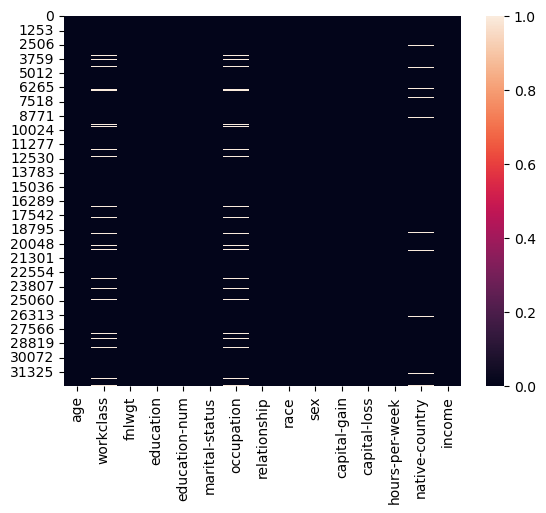

In [11]:
#Lets plot Null values in heatmap
sns.heatmap(data.isna())
plt.show()

In [12]:
#Lets check for duplicated value
data.duplicated().sum()

24

In [13]:
#Lets drop the duplicates value
data.drop_duplicates(inplace=True)

In [14]:
#Lets check for duplicated value Again
data.duplicated().sum()

0

In [16]:
#Lets check the shape of the dataset
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

So, Here we have 6 Int Columns , 9 Object Type Columns .

In [18]:
#Lets check for info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [19]:
#Lets check for statistical data summary
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Observations
    
    Age Columns is Normally Distributed . Looking right Skewed .
    Capital-gain have Outliers .
    Capital_loss have Outliers .
    Hours-per-week have outliers .
    
Lets move foreward in Visualization then we will confirm that .
       

In [20]:
#Lets see data description of Object Columns
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,30701,32537,32537,30694,32537,32537,32537,31955,32537
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


# Observation
    
    We have null values in Workclass 
    We have null values in native-country
    We have null values in occupation.
    
    
    
Lets move foreward in Visualization

# EDA -> Exploratory Data Analysis

Univariate Analysis

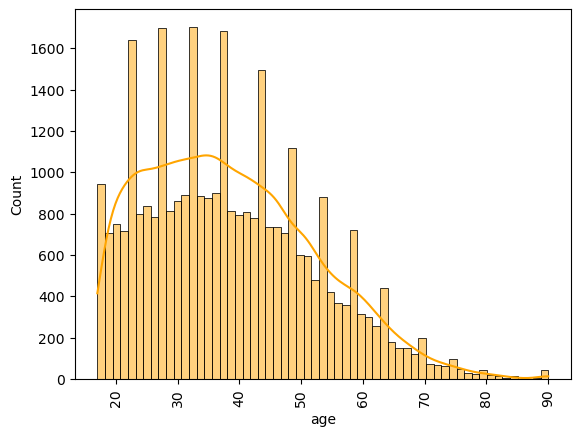

In [41]:
#Lets plot Age
sns.histplot(x='age',data=data,kde=True,color='orange')
plt.xticks(rotation=90)
plt.show()

Here we can see that Most the people age is lie between 25-45. and Data look like right skewed . We have to remove skewness because 90 Age people are not able to work. So we have to use some technique and make a normal distribution.

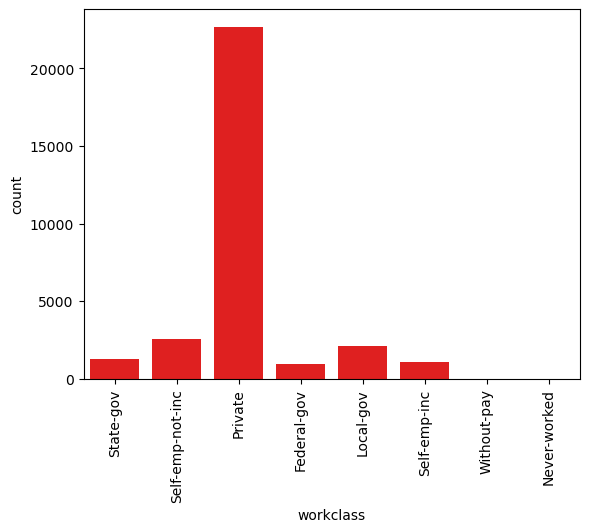

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [47]:
#Lets plot workclass
sns.countplot(x='workclass',data=data,color='red')
plt.xticks(rotation=90)
plt.show()
data['workclass'].value_counts()

So, Here we can see that most of people doing job in Private Comapny and then Selp_Emp and then Local Govt and least of the people working in (Without pay and Never Worked)

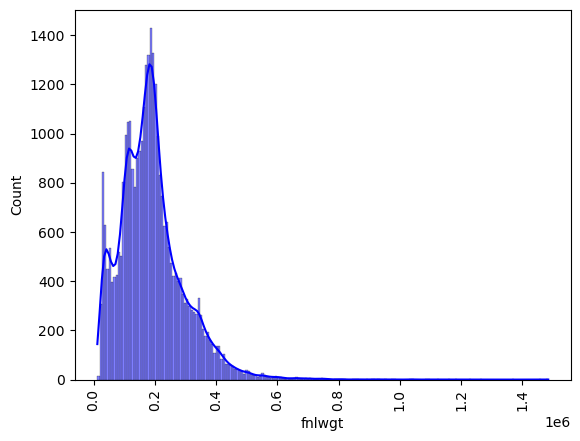

In [45]:
#Lets plot fnlwgt
sns.histplot(x='fnlwgt',data=data,kde=True,color='blue')
plt.xticks(rotation=90)
plt.show()

So, Here we can see that we have Right Skewed Data . But not contain Outliers ..

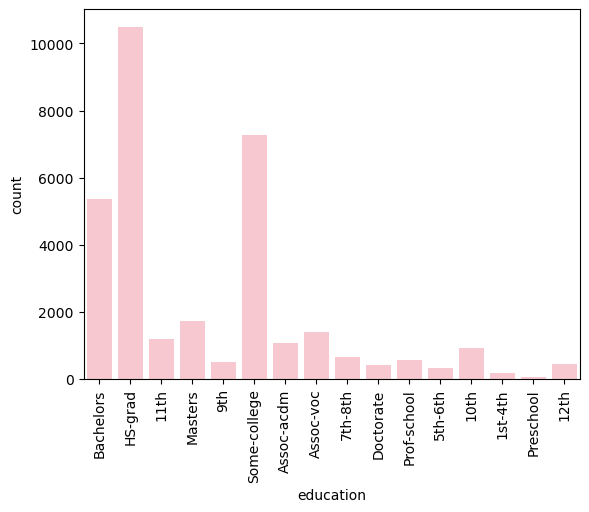

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

In [48]:
#Lets plot education
sns.countplot(x='education',data=data,color='pink')
plt.xticks(rotation=90)
plt.show()
data['education'].value_counts()

Most of the people is Completed is "High School Grad" . the "Some college" and then "Bachelors" and least people are completed Preschool and the 1st-4th.

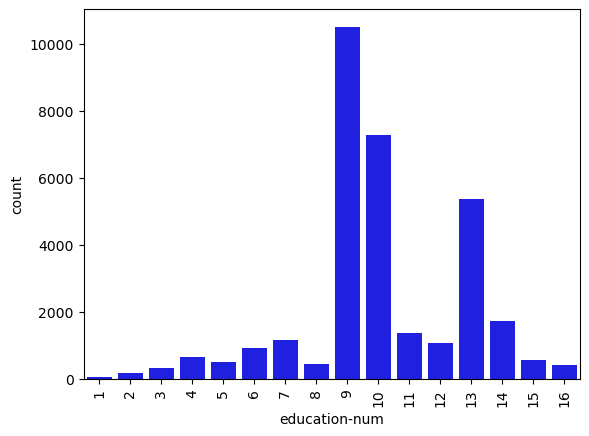

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

In [53]:
#Lets plot education-num
sns.countplot(x='education-num',data=data,color='blue')
plt.xticks(rotation=90)
plt.show()
data['education-num'].value_counts()

So, Here we can see that most of the educationa-num is 9 then 10 then 13 then 14 and 11 . and least is is 1 then 2 then 3 then 16 and 8.

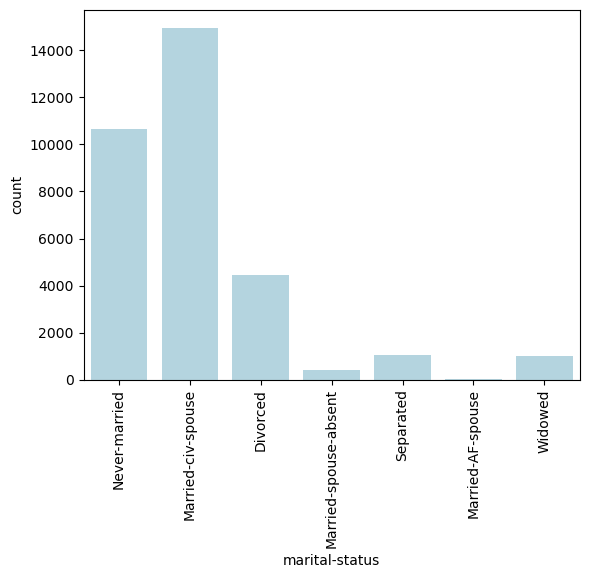

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [60]:
#Lets plot marital-status
sns.countplot(x='marital-status',data=data,color='lightblue')
plt.xticks(rotation=90)
plt.show()
data['marital-status'].value_counts()

So, Here we can see that Most of the people are Married, then peoples are Never Married , then Peoples are Divorced . and then Separated Peoples .


Least of the people spouse in the Armed Forces and then Spouse Absent .

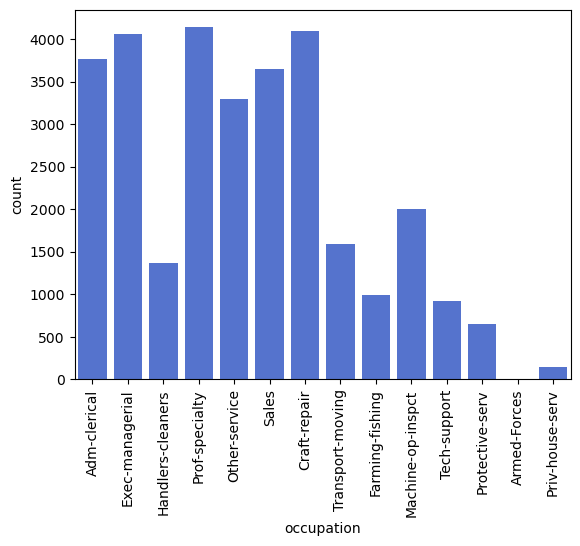

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [62]:
#Lets plot occupation
sns.countplot(x='occupation',data=data,color='royalblue')
plt.xticks(rotation=90)
plt.show()
data['occupation'].value_counts()

So, Here we can see that most of the people are "Prof-specialty" then "Craft-repair" then "Exec-managerial" then "Adm-clerical" then "Sales".
 
 
 and least from 'Armed Force' then 'Private House Servent" then "protective Servent" then "Tech Support"

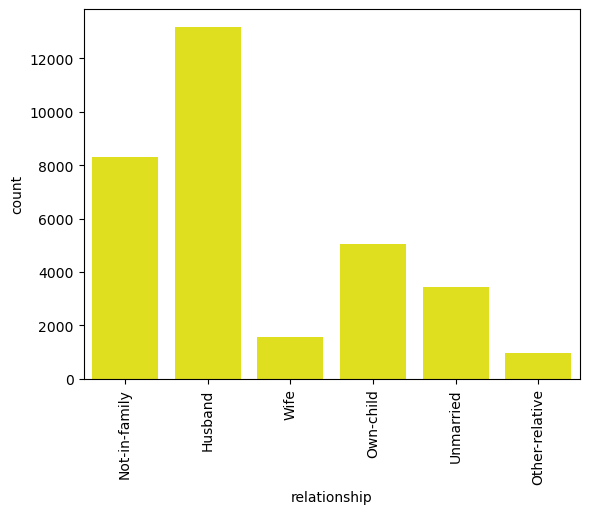

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [64]:
#Lets plot relationship
sns.countplot(x='relationship',data=data,color='yellow')
plt.xticks(rotation=90)
plt.show()
data['relationship'].value_counts()

So, here we can see that most the people Husband the Not in Family the Own Child ..

Least are - Other Relative then Wife then Unmarried

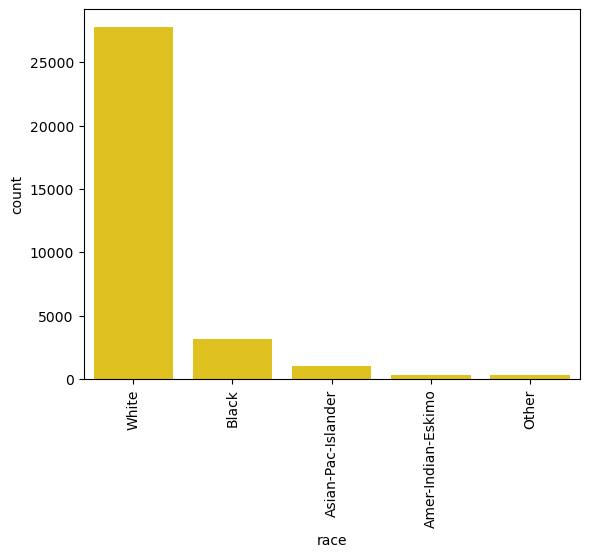

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [66]:
#Lets plot race
sns.countplot(x='race',data=data,color='gold')
plt.xticks(rotation=90)
plt.show()
data['race'].value_counts()

So, Herw we can see that most of the people are white and then Black then Asian Pac Islander . then Amer Indian Eskimo then Other.

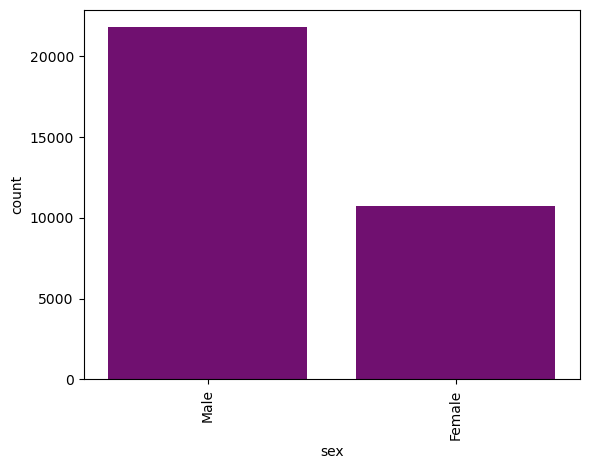

Male      21775
Female    10762
Name: sex, dtype: int64

In [69]:
#Lets plot sex
sns.countplot(x='sex',data=data,color='purple')
plt.xticks(rotation=90)
plt.show()
data['sex'].value_counts()

So,here we can see that most of the people are  21775 Male and then 10762 Female .

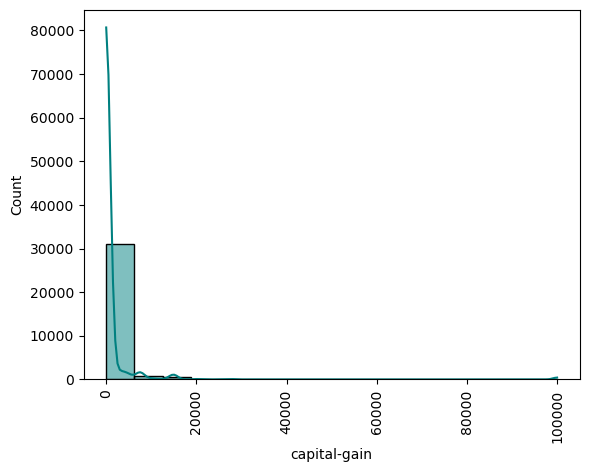

In [71]:
#Lets plot capital-gain
sns.histplot(x='capital-gain',data=data,kde=True,color='teal')
plt.xticks(rotation=90)
plt.show()

So, here we can see that most of the people capital gain in 0 to 20000. the data is follow right skewed.

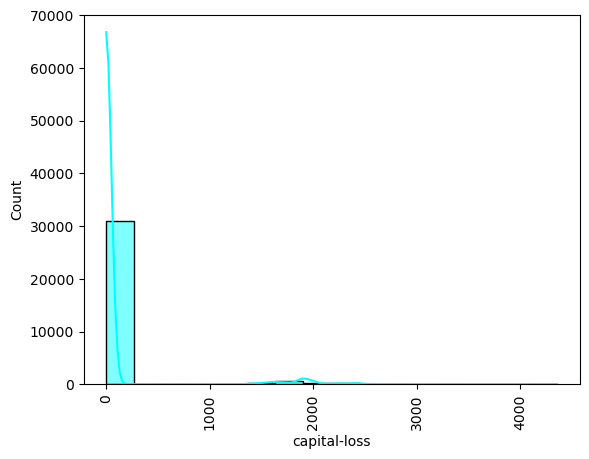

In [72]:
#Lets plot capital-loss
sns.histplot(x='capital-loss',data=data,kde=True,color='cyan')
plt.xticks(rotation=90)
plt.show()

So , Here we can see that capital-loss is maximum in 0 then in 2000 we have come capital-loss and then data started following skewness .

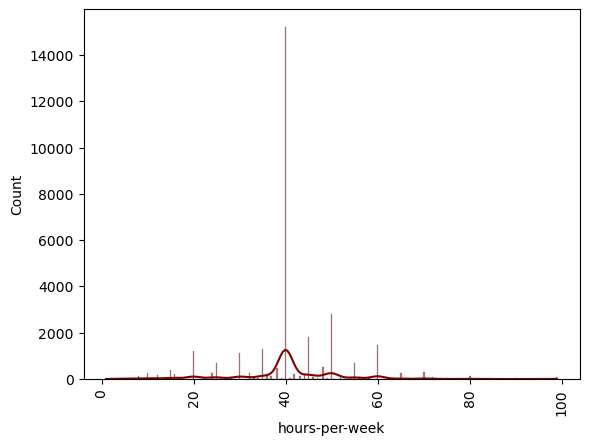

In [76]:
#Lets plot hours-per-week
sns.histplot(x='hours-per-week',data=data,kde=True,color='maroon')
plt.xticks(rotation=90)
plt.show()

So, here we can see that most of the people follow the govt rule of 1 week working (48) hours . but some people are doing less then 48 and some are doing more then 48 years . and this follows some outliers . because not one can allow to do 100 hours in a week . So in this columns we have outliers we have to treat this


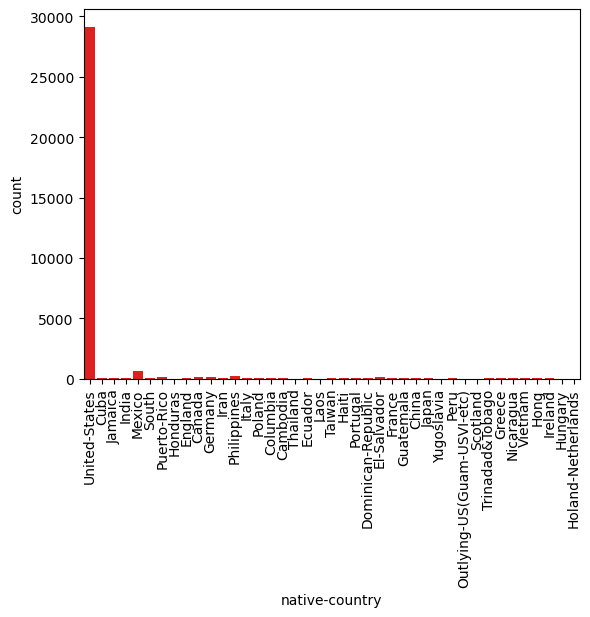

United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [81]:
#Lets plot hours-per-week
sns.countplot(x='native-country',data=data,color='red')
plt.xticks(rotation=90)
plt.show()
data['native-country'].value_counts()

So, Here we can see that maximum times native country is US then Mexico then Philippines then Germany and follow by other countries

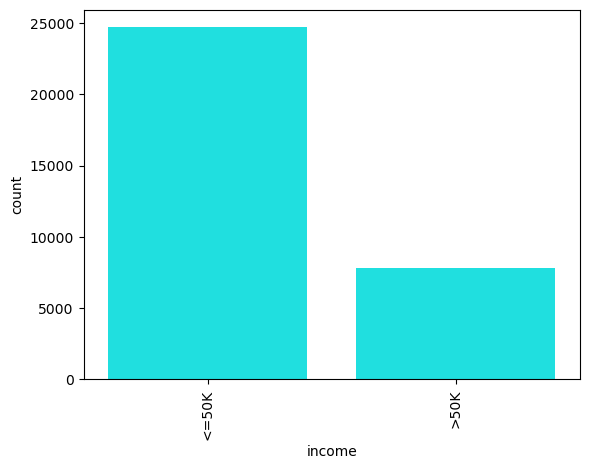

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [85]:
#Lets plot income
sns.countplot(x='income',data=data,color='cyan')
plt.xticks(rotation=90)
plt.show()
data['income'].value_counts()

So, Here we can see that our label is imbalanced . so we have to treat them but not right now. 

# Bivariate Analysis

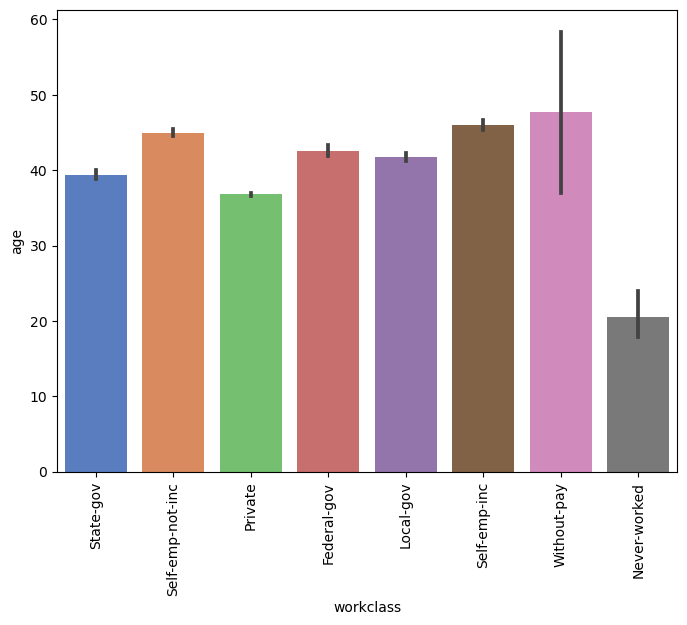

In [91]:
#Lets plot Age with workclass
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='workclass',data=data,palette='muted')
plt.xticks(rotation=90)
plt.show()

So, Here we can clearly see that Never Worked Belongs to 10- 20 Age . and there are lots of people who work for free may be its a work  for public growth. and .

     and most important things we can see that not one work beyond age 50. So, Here we confirm that we have outliers in Age columns .

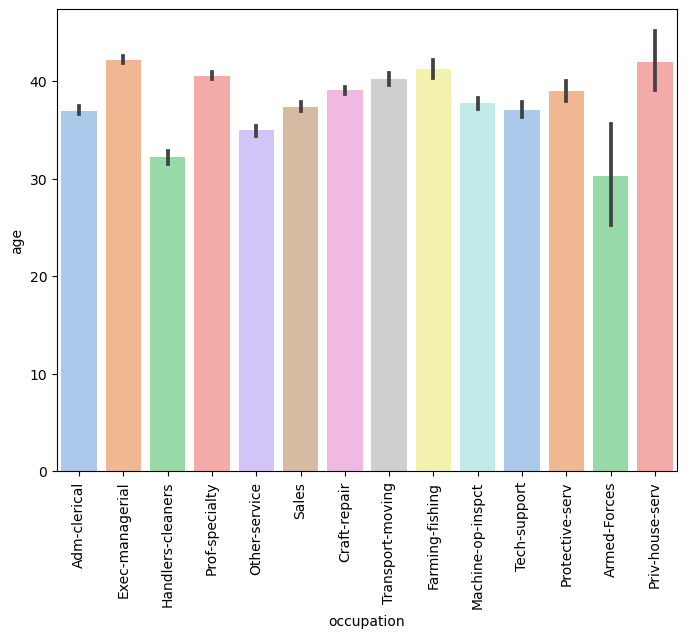

In [94]:
#Lets plot Age with workclass
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='occupation',data=data,palette='pastel')
plt.xticks(rotation=90)
plt.show()

Here we can also see that . all the peoples are who work is less then 60 age .

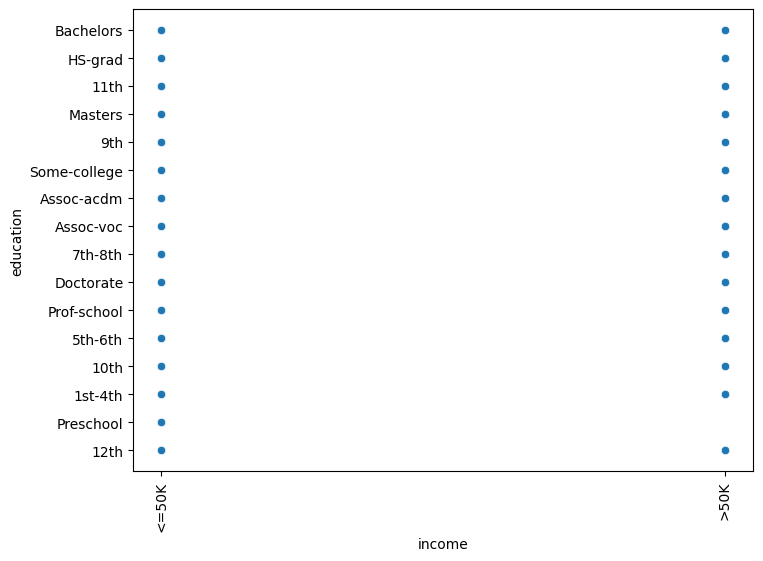

In [105]:
#Lets plot education with income
plt.figure(figsize=(8,6))
sns.scatterplot(y='education',x='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that if your education qualification is  1st- 4th then your salary is <50K. and whatever your qualification ang you have experiance then you get >50K

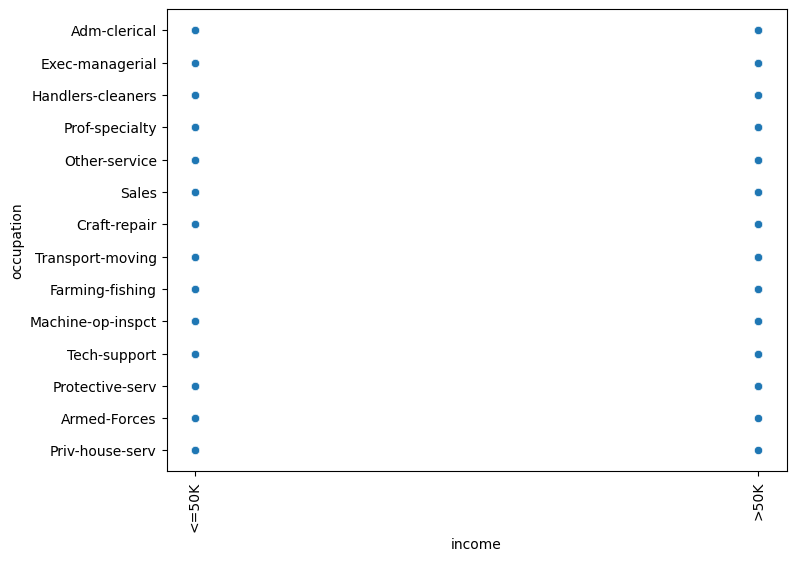

In [107]:
#Lets plot occupation with income
plt.figure(figsize=(8,6))
sns.scatterplot(y='occupation',x='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

So , Here we can see that if you do any work you get a chance of get >50 K

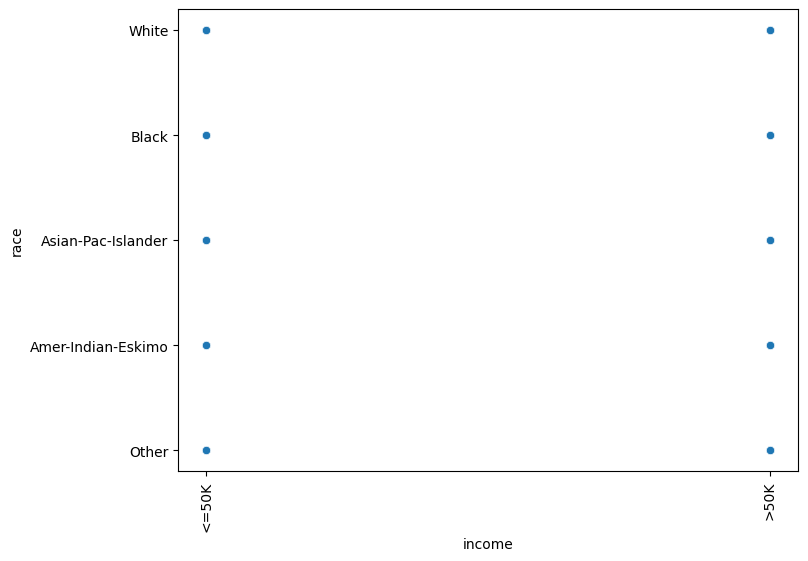

In [110]:
#Lets plot race with income
plt.figure(figsize=(8,6))
sns.scatterplot(y='race',x='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that Color is not matter for any thing its just for name shake .

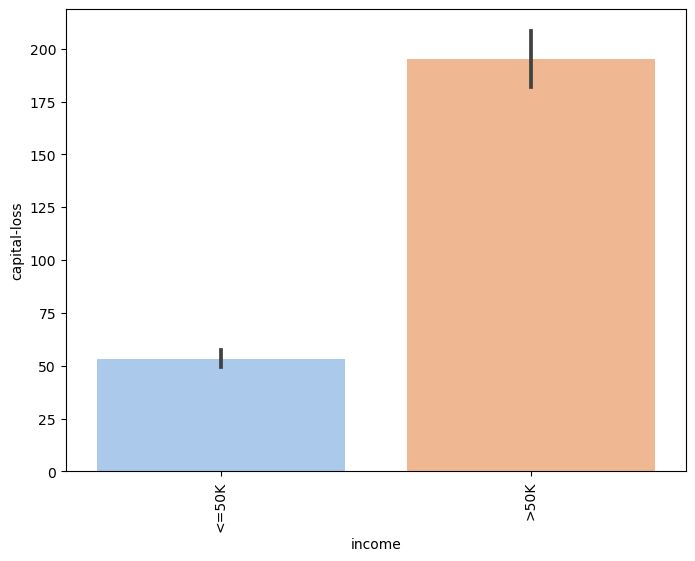

In [114]:
#Lets plot capital_loss with income
plt.figure(figsize=(8,6))
sns.barplot(y='capital-loss',x='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that if >50k then your capital_loss is high . 

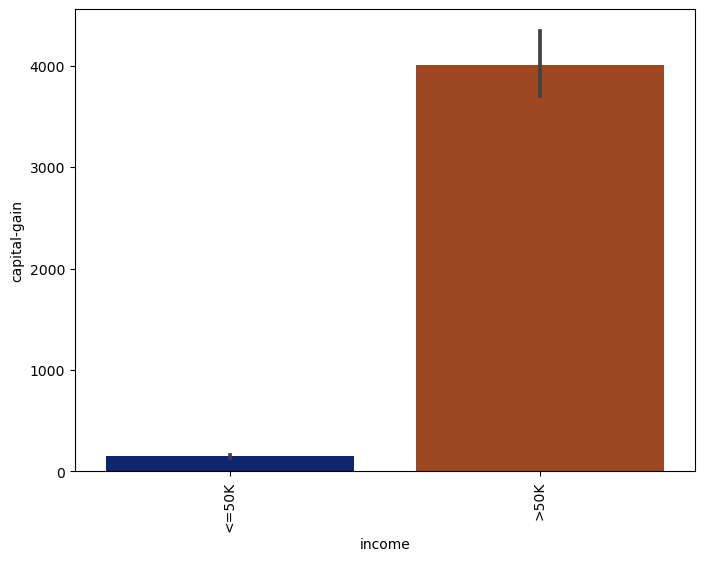

In [119]:
#Lets plot capital_gain with income
plt.figure(figsize=(8,6))
sns.barplot(y='capital-gain',x='income',data=data,palette='dark',)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that if >50k then your capital_gain is high

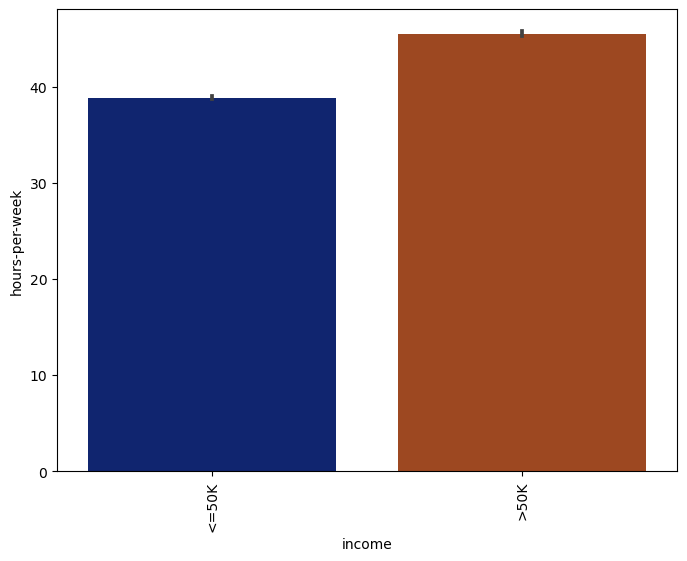

In [120]:
#Lets plot hours-per-week with income
plt.figure(figsize=(8,6))
sns.barplot(y='hours-per-week',x='income',data=data,palette='dark',)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that if you work less the 40hr in week . you have chance of getting <50K 

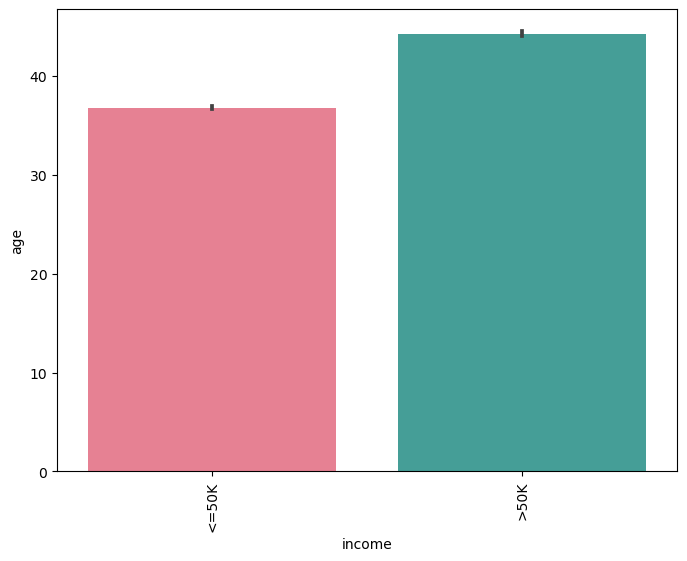

In [123]:
#Lets plot age with income
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='income',data=data,palette='husl',)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that if you age is less 38 then you have chances to get <50K

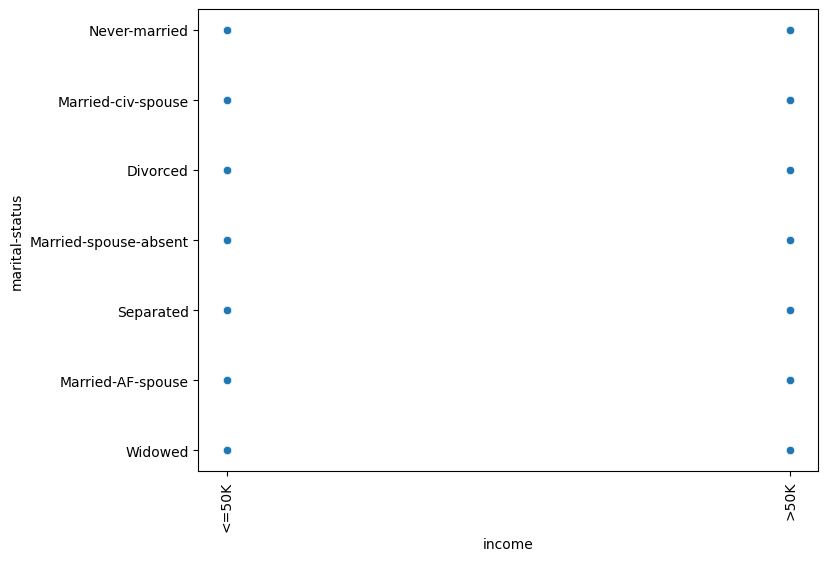

In [126]:
#Lets plot martial_status with income
plt.figure(figsize=(8,6))
sns.scatterplot(y='marital-status',x='income',data=data,palette='husl',)
plt.xticks(rotation=90)
plt.show()

Here we can see that income is not depend upon the martial status.

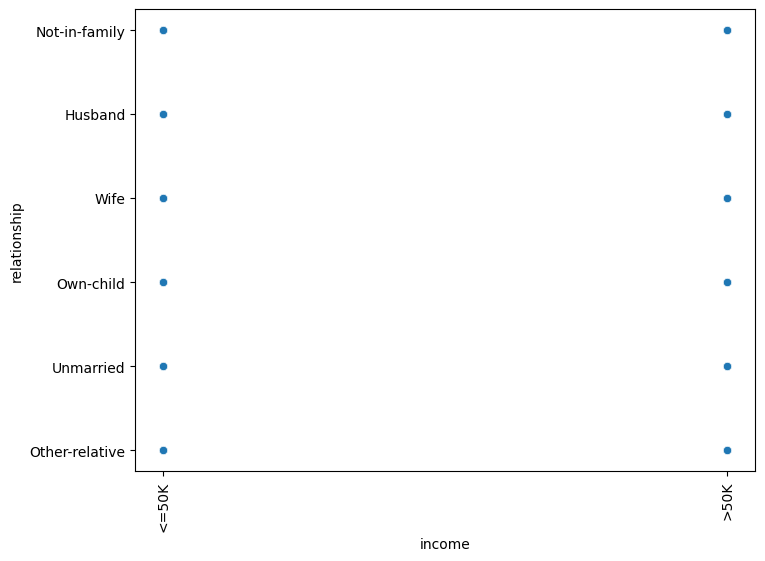

In [128]:
#Lets plot relationship with income
plt.figure(figsize=(8,6))
sns.scatterplot(y='relationship',x='income',data=data,palette='husl',)
plt.xticks(rotation=90)
plt.show()

Here we can see that income is not depend upon the relation status

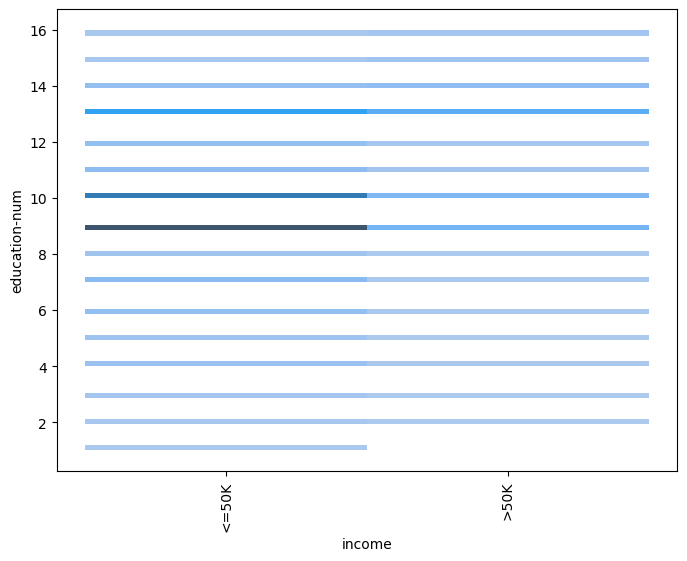

In [131]:
#Lets plot edu_num with income
plt.figure(figsize=(8,6))
sns.histplot(y='education-num',x='income',data=data,palette='husl',)
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis

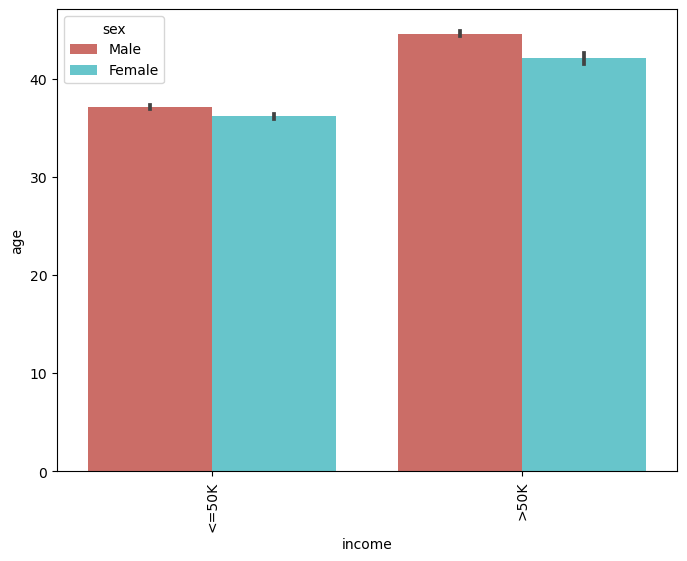

In [135]:
#Lets plotage with income and sex
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='income',hue='sex',data=data,palette='hls',)
plt.xticks(rotation=90)
plt.show()

So , Here we can see that if your age is less then <38 then you dont get >50 K salary . and male and female are equal in count

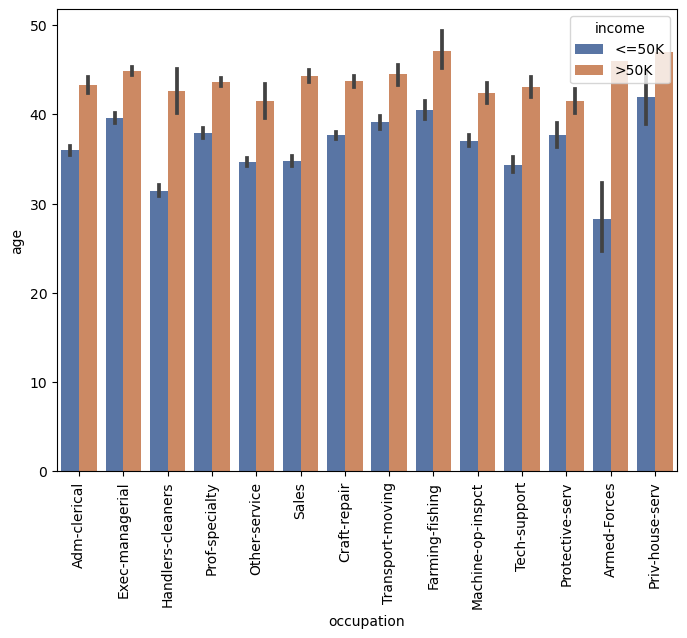

In [138]:
#Lets plot age with income and occupation
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='occupation',hue='income',data=data,palette='deep',)
plt.xticks(rotation=90)
plt.show()

So, Here we can clearly see that if our age is >40 then our chances is increase to get >50K income.

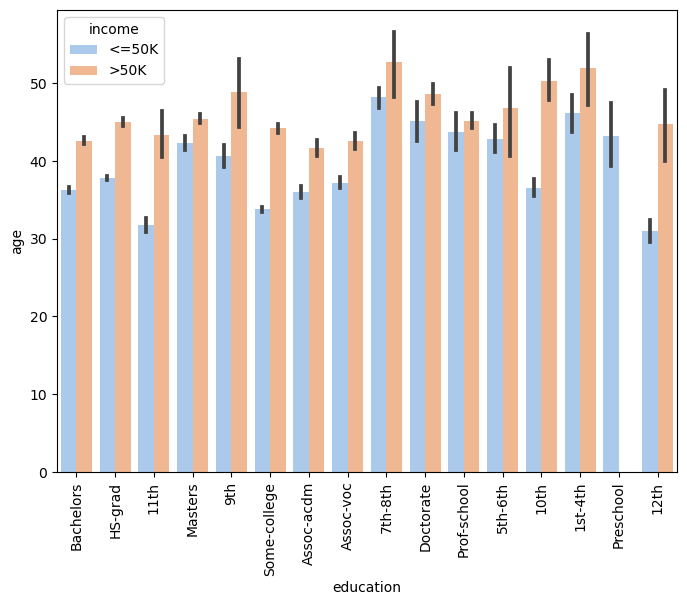

In [144]:
#Lets plot age with income and education
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='education',hue='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

So, here we can see that what is our qualification . is not depend income only depend on experiance .

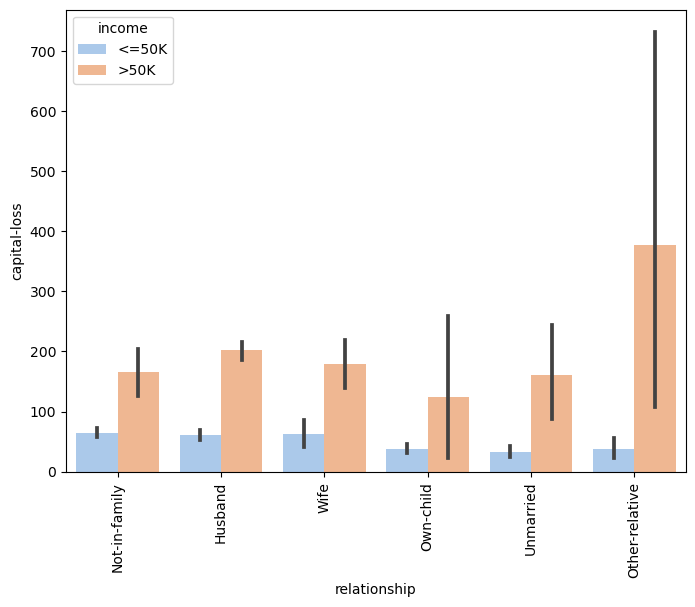

In [146]:
#Lets plot capital loss with income and education
plt.figure(figsize=(8,6))
sns.barplot(y='capital-loss',x='relationship',hue='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

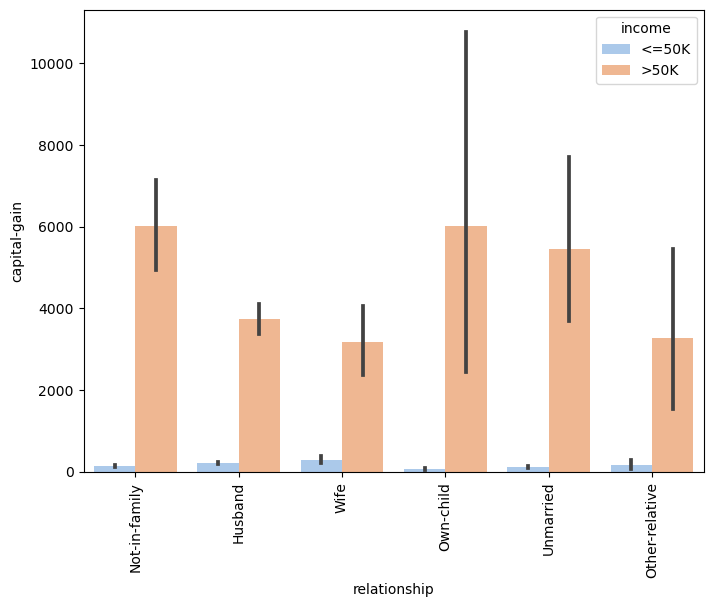

In [147]:
#Lets plot capital gain with income and education
plt.figure(figsize=(8,6))
sns.barplot(y='capital-gain',x='relationship',hue='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

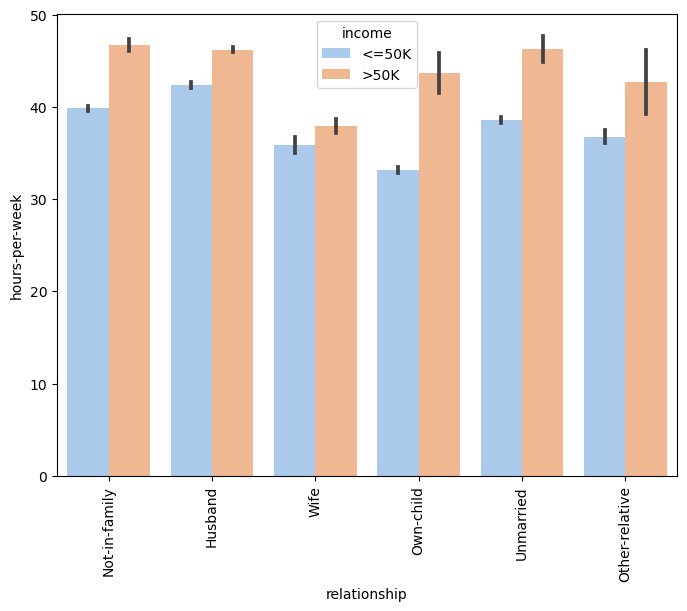

In [149]:
#Lets plot hours per week with income and education
plt.figure(figsize=(8,6))
sns.barplot(y='hours-per-week',x='relationship',hue='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that those person who work for more then 48 hours . then he will get more income .

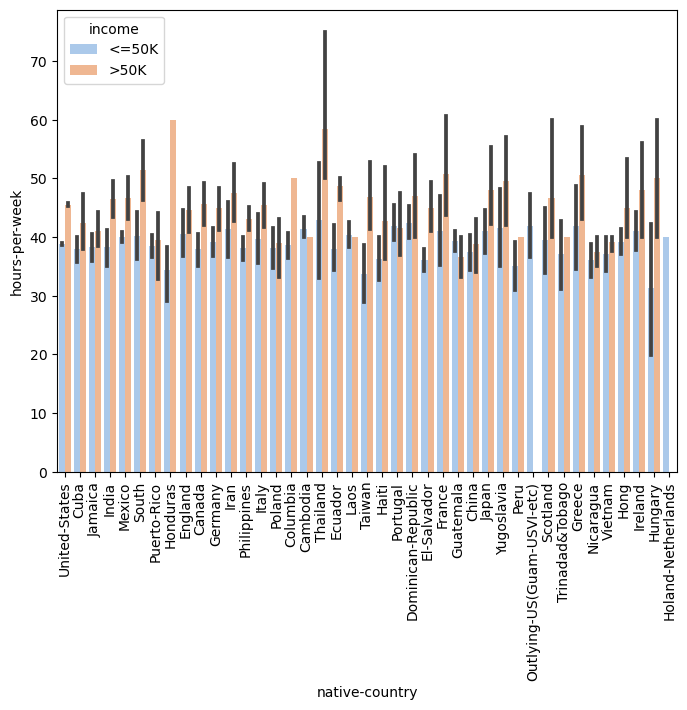

In [151]:
#Lets plot capital gain with income and education
plt.figure(figsize=(8,6))
sns.barplot(y='hours-per-week',x='native-country',hue='income',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

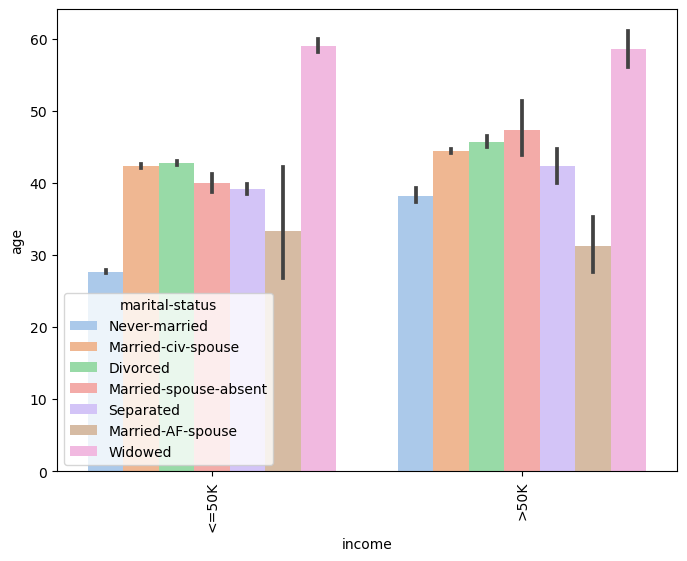

In [155]:
#Lets plot capital gain with income and education
plt.figure(figsize=(8,6))
sns.barplot(y='age',x='income',hue='marital-status',data=data,palette='pastel',)
plt.xticks(rotation=90)
plt.show()

Here , We can clearly see that if age is more then 50 then there is more chance to get income more then 50> K and we can see that if she is a widow then she get more benefits from govt .

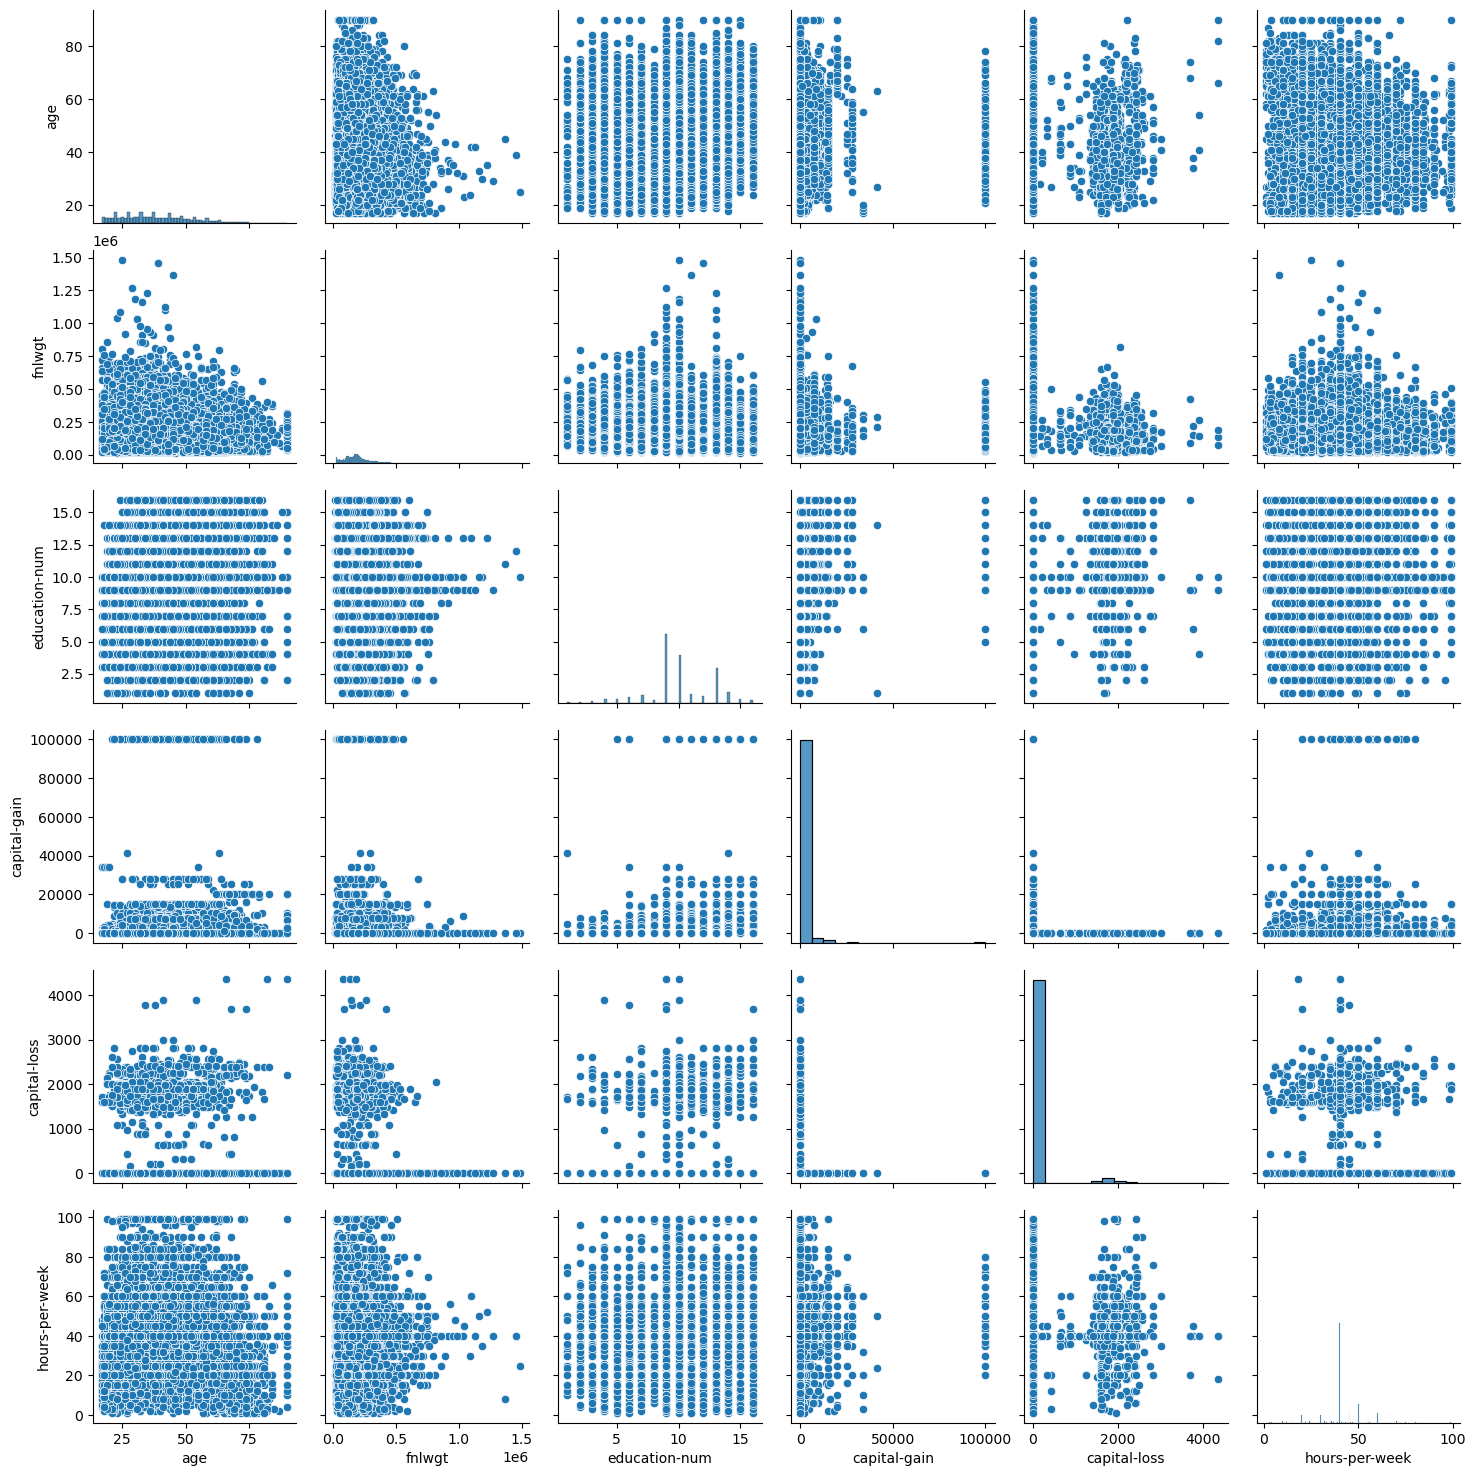

In [158]:
#Lets plot pairplot
sns.pairplot(data)
plt.show()

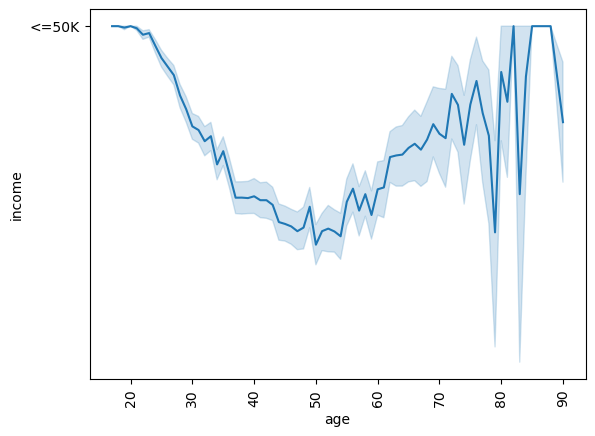

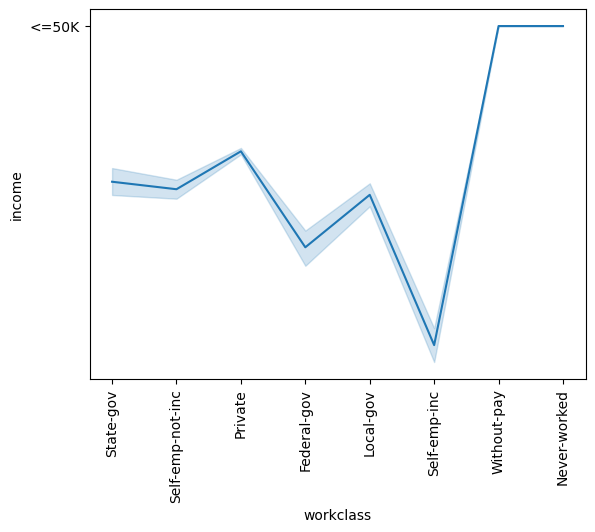

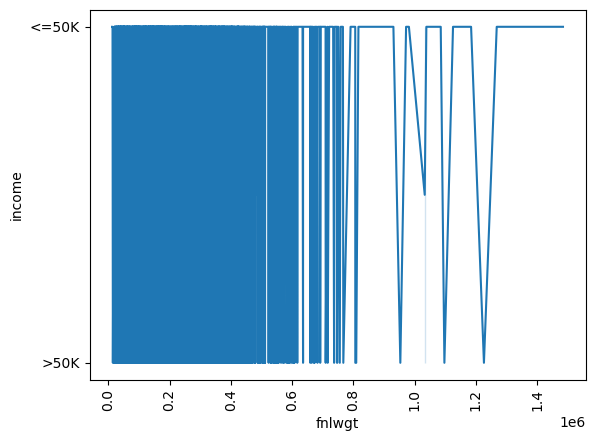

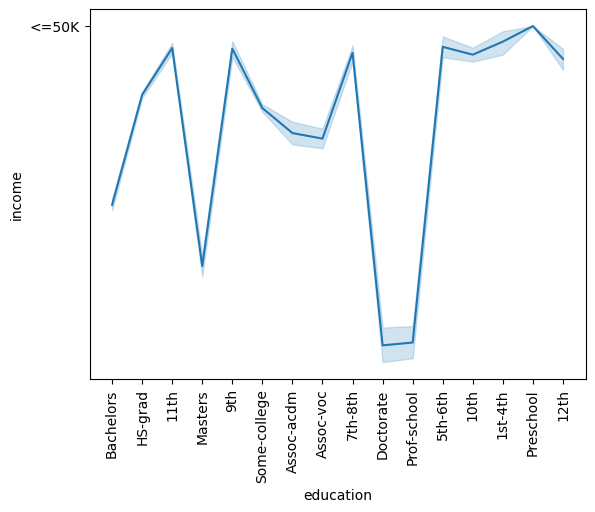

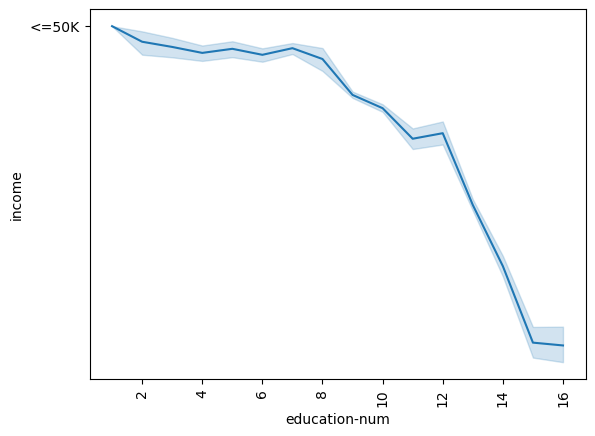

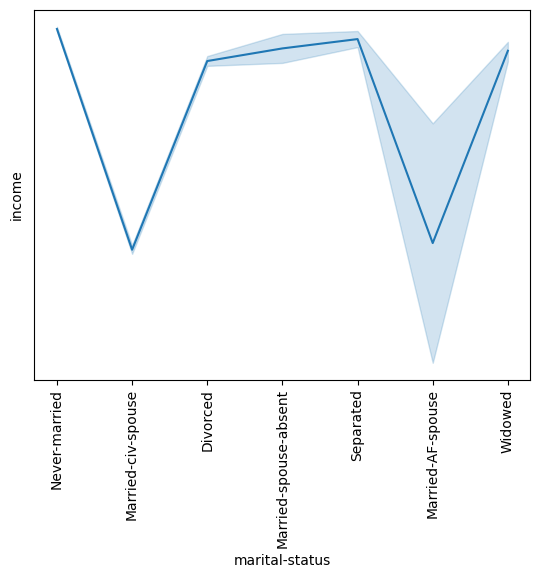

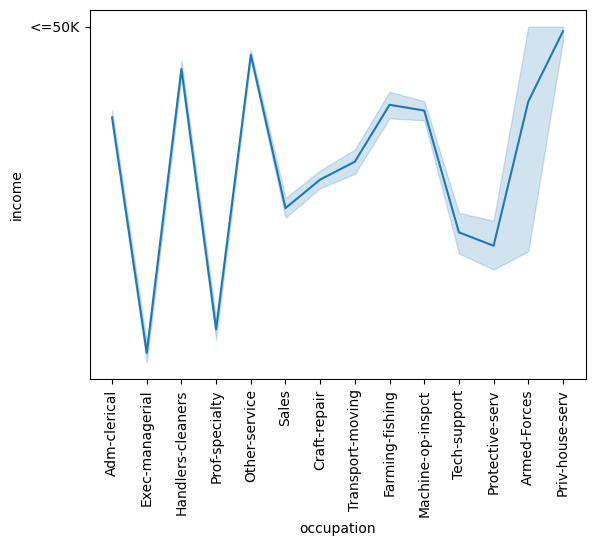

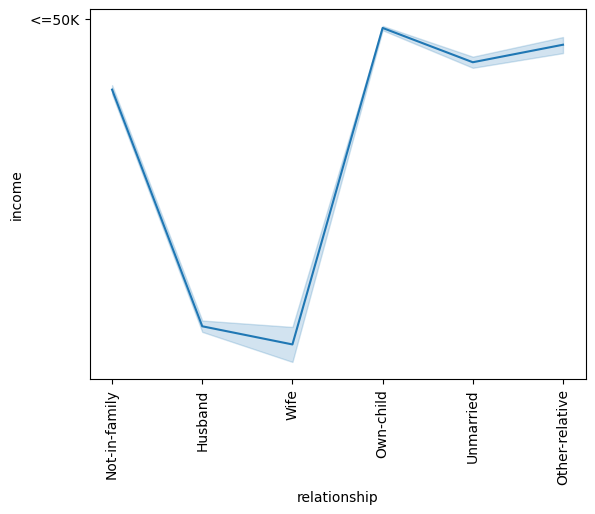

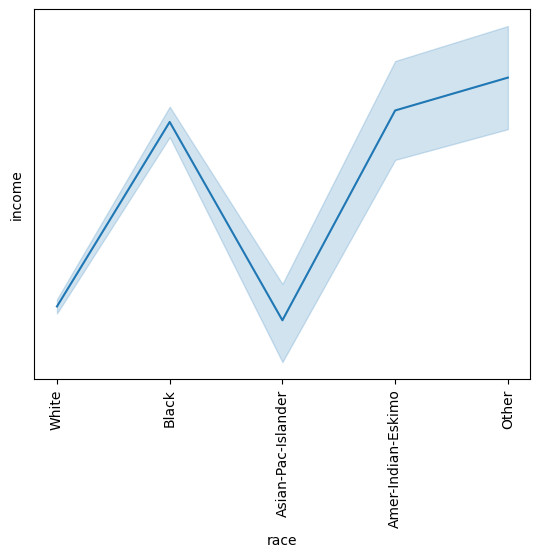

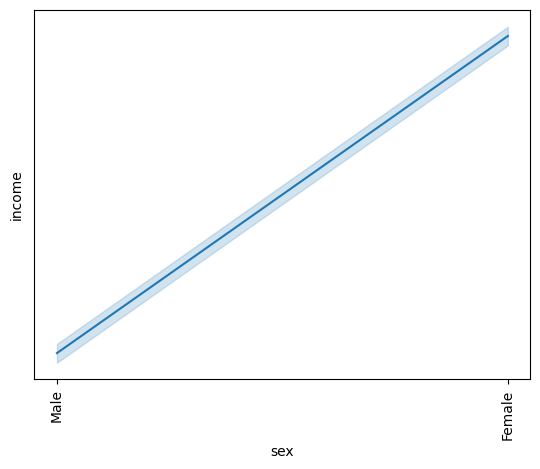

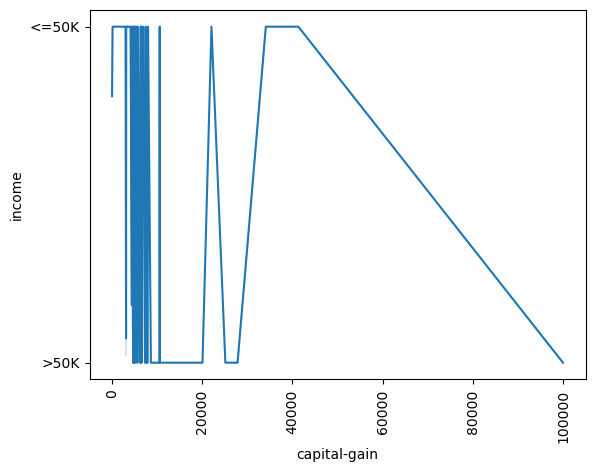

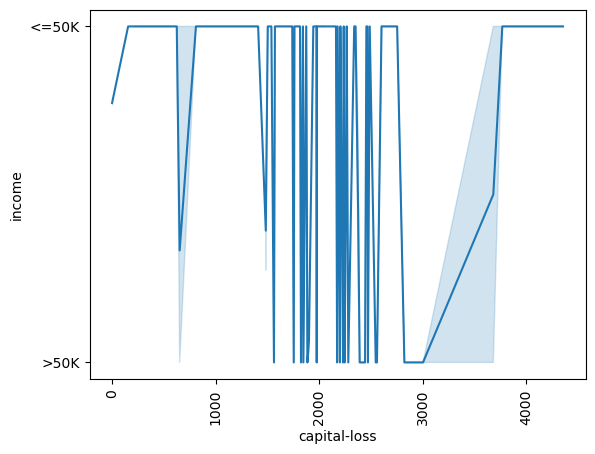

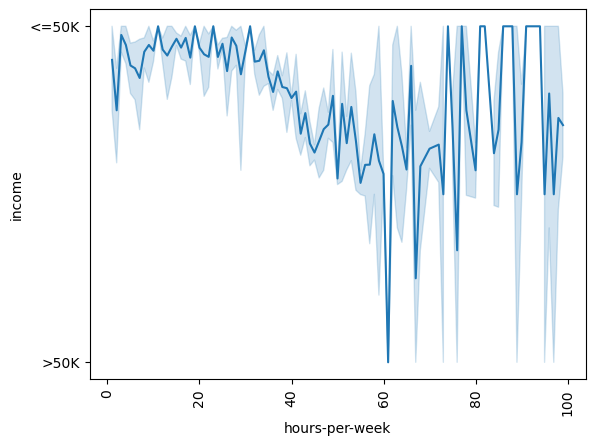

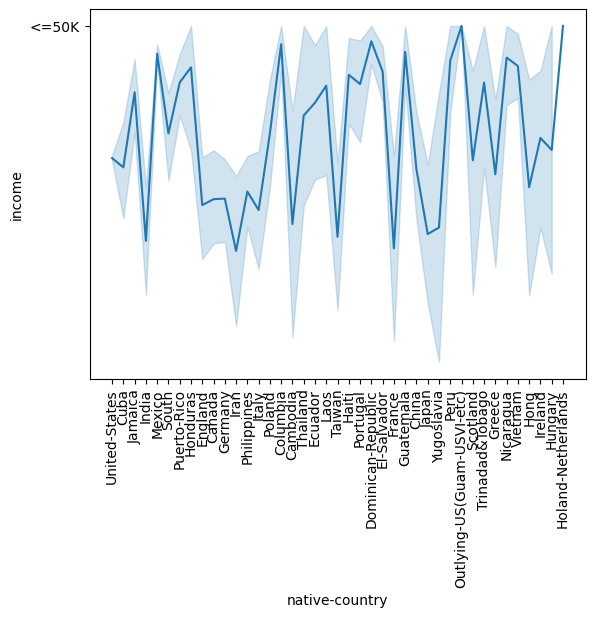

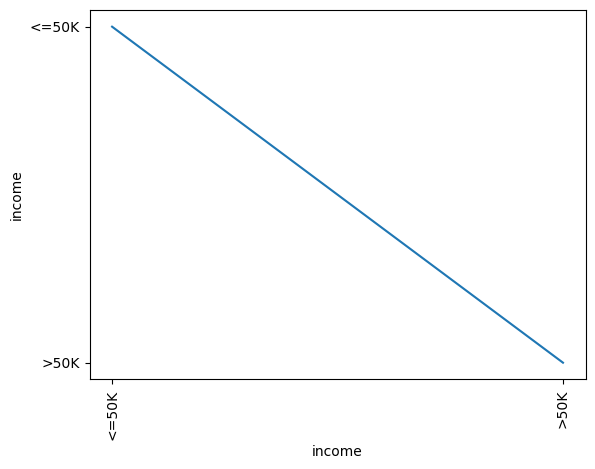

In [159]:
#lets plot Line plot for all columns for checking relation
#Lets plot Rel Plot for checking the relation between feature and label
for i in data:
    plt.figure()
    sns.lineplot(x=data[i],y=data['income'])
    plt.xticks(rotation=90)
    plt.show()

In [160]:
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


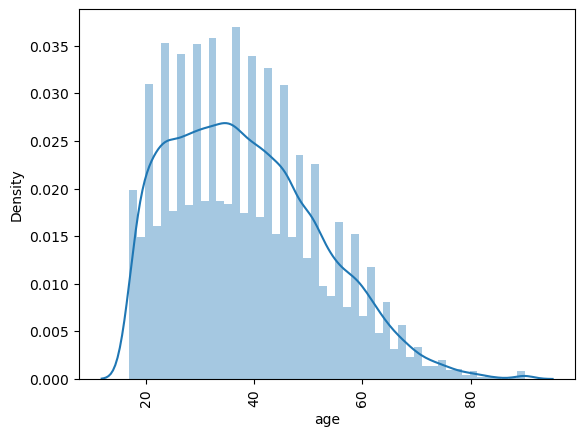

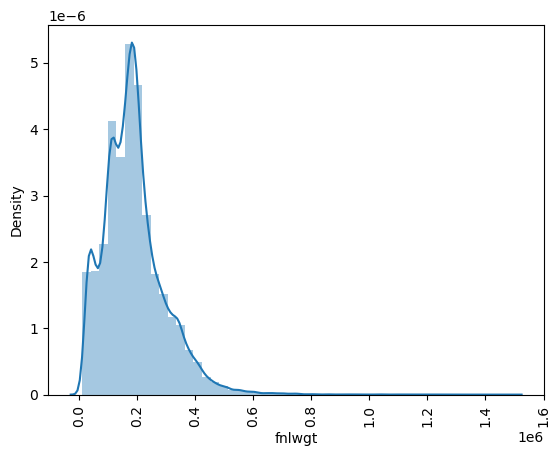

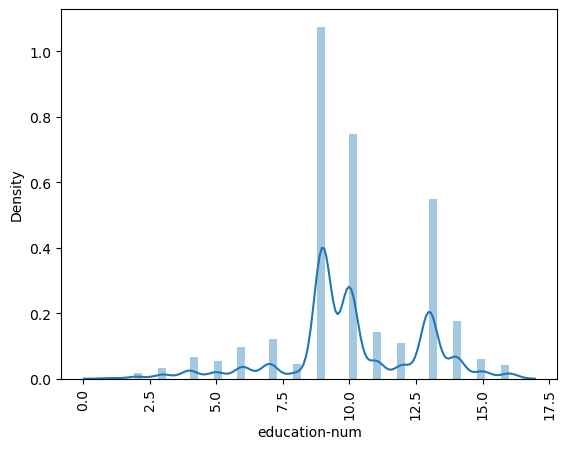

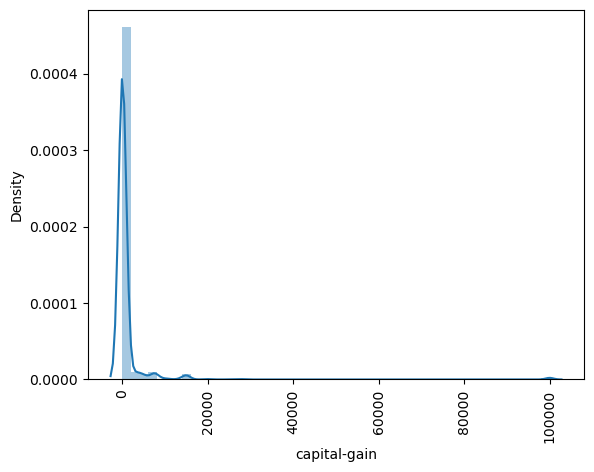

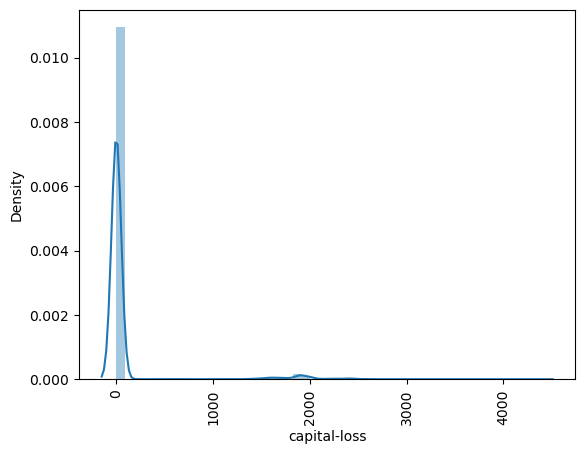

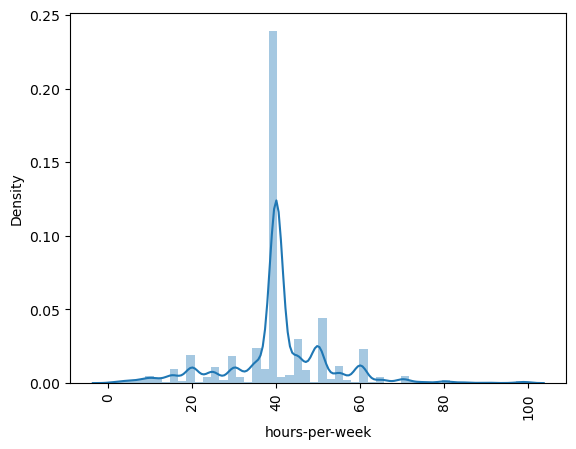

In [162]:
import warnings
warnings.filterwarnings('ignore')
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.distplot(newdf[i])
    plt.xticks(rotation=90)
    plt.show()

# Observation

    Age is right Skewed
    fnlwgt is right Skewed
    Capital gain is right skewed
    Capital loss is right skewed

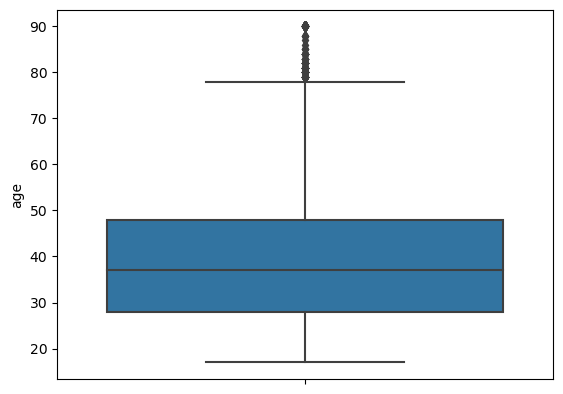

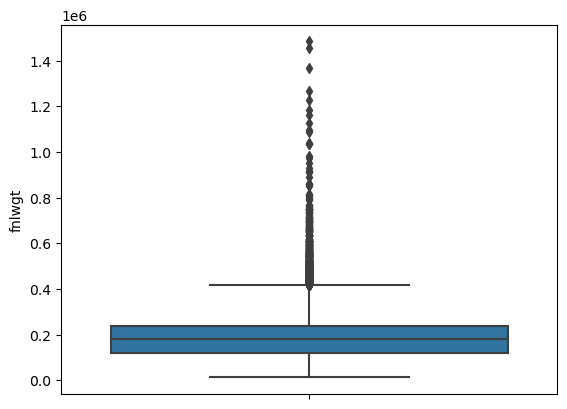

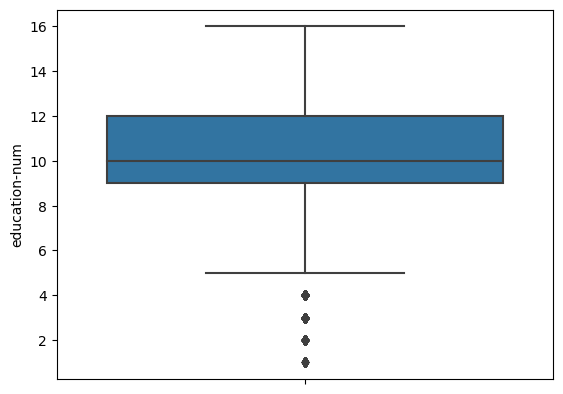

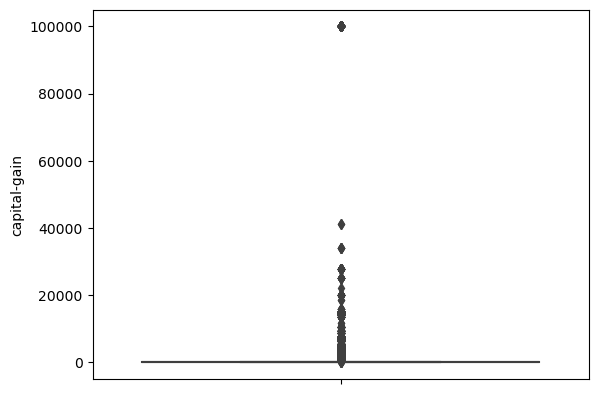

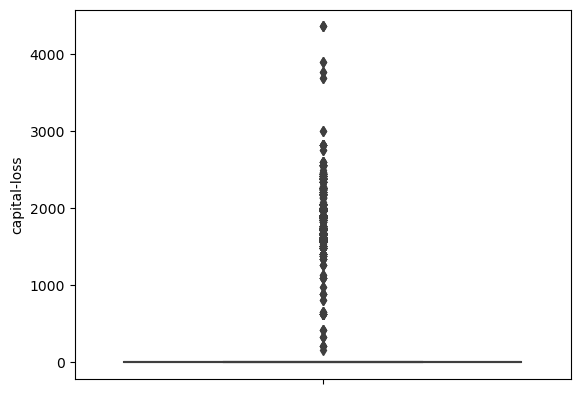

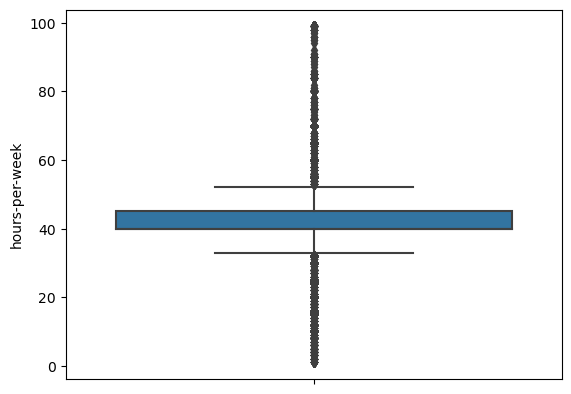

In [163]:
#Lets plot Box plot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    plt.xticks(rotation=90)
    plt.show()

# Observation
    Age is Containing some outliers 
    fnlwgt is Containing some outliesrs
    educationa-num  containing outliers 
    capital gain have outliers
    capital loss have outliers 
    hours per week have outliers
    

So, Here we complete our visualization part ..Lets move foreward to Preprocessing steps.

# Preprocessing Steps

In [164]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [165]:
#Lets drop unncessory columns
data.drop(columns=['race'],inplace=True)

So, Here we deleted the race column because i think that color is not matter for any income.

In [168]:
#Lets drop null values . 
print(data.isna().sum().sum())
data.dropna(inplace=True)

4261


Here i am deciding to drop Nan Values Because  i dont want any Biasness. any i dont want to fill Nan with Mean, Median, Mode, bfill,ffill methods.

In [169]:
#Lets check again the isnull values
data.isna().sum().sum()

0

Here we can see that we dont have any null values . Lets check the shape of the dataset again

In [170]:
#Lets chech the shape of the dataset
data.shape

(30139, 14)

So, Now we have 30139 Rows and 14 Columns 

In [171]:
#Lets Check for Outliers
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


# Lets Remove Outliers

In [175]:
import numpy as np
from scipy.stats import zscore

In [178]:
features = data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

In [179]:
# Using zscore to remove outliers

z=np.abs(zscore(features))
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [180]:
#Lets check the shape of the old dataset
data.shape

(30139, 14)

In [181]:
#Lets check the shape of the dataset after applying zscore method
new_df.shape

(27602, 14)

In [182]:
# Checking the the data loss
data_loss = (30139-27602)/30139*100
data_loss

8.417664819668866

So, here we loss 8% of data .Lets check for IQR method

# IQR (Inter Quantile Range) method

In [183]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [184]:
df1.shape

(18442, 14)

In [185]:
# Checking the the data loss
data_loss = (30139-18442)/30139*100
data_loss

38.81017950164239

So , Here we remoce 38% of data .lets move foreward with Z score if we dont get better result with Z Score Method then we choose IQR Method.

# Encoding the categorical columns using Label Encoding

In [186]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'native-country', 'income']


In [187]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [188]:
new_df[categorical_col]

,workclass,education,marital-status,occupation,relationship,sex,native-country,income
0,5,8,4,0,1,1,37,0
1,4,8,2,3,0,1,37,0
2,2,10,0,5,1,1,37,0
3,2,1,2,5,0,1,37,0
4,2,8,2,9,5,0,4,0
...,...,...,...,...,...,...,...,...
32556,2,6,2,12,5,0,37,0
32557,2,10,2,6,0,1,37,1
32558,2,10,6,0,4,0,37,0
32559,2,10,4,0,3,1,37,0


# Correlation between the target variable and features using HEAT map

In [189]:
# Checking the correlation
cor = new_df.corr()
cor

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.072614,-0.074160,0.003494,0.045728,-0.293740,-0.007486,-0.248634,0.078535,0.130158,0.019815,0.121362,-0.002245,0.245765
workclass,0.072614,1.000000,-0.030703,0.015263,0.034494,-0.030516,0.015933,-0.067187,0.072639,0.015941,-0.007538,0.034847,0.007012,0.008466
fnlwgt,-0.074160,-0.030703,1.000000,-0.022150,-0.039770,0.033081,-0.001475,0.008518,0.026635,-0.003104,0.000642,-0.021470,-0.064660,-0.009573
education,0.003494,0.015263,-0.022150,1.000000,0.345148,-0.038135,-0.039472,-0.013600,-0.028868,0.028916,-0.003078,0.063946,0.073643,0.074117
education-num,0.045728,0.034494,-0.039770,0.345148,1.000000,-0.052252,0.086210,-0.093705,0.001524,0.154693,0.006853,0.154263,0.060107,0.318840
marital-status,-0.293740,-0.030516,0.033081,-0.038135,-0.052252,1.000000,0.023012,0.176210,-0.113877,-0.065648,-0.013286,-0.195902,-0.021955,-0.188956
occupation,-0.007486,0.015933,-0.001475,-0.039472,0.086210,0.023012,1.000000,-0.052855,0.064893,0.014458,-0.001596,0.007180,-0.002633,0.046185
relationship,-0.248634,-0.067187,0.008518,-0.013600,-0.093705,0.176210,-0.052855,1.000000,-0.579808,-0.090012,0.033235,-0.267404,-0.011543,-0.245934
sex,0.078535,0.072639,0.026635,-0.028868,0.001524,-0.113877,0.064893,-0.579808,1.000000,0.071470,-0.030143,0.234431,0.000759,0.210904
capital-gain,0.130158,0.015941,-0.003104,0.028916,0.154693,-0.065648,0.014458,-0.090012,0.071470,1.000000,-0.009322,0.099093,0.010854,0.339953


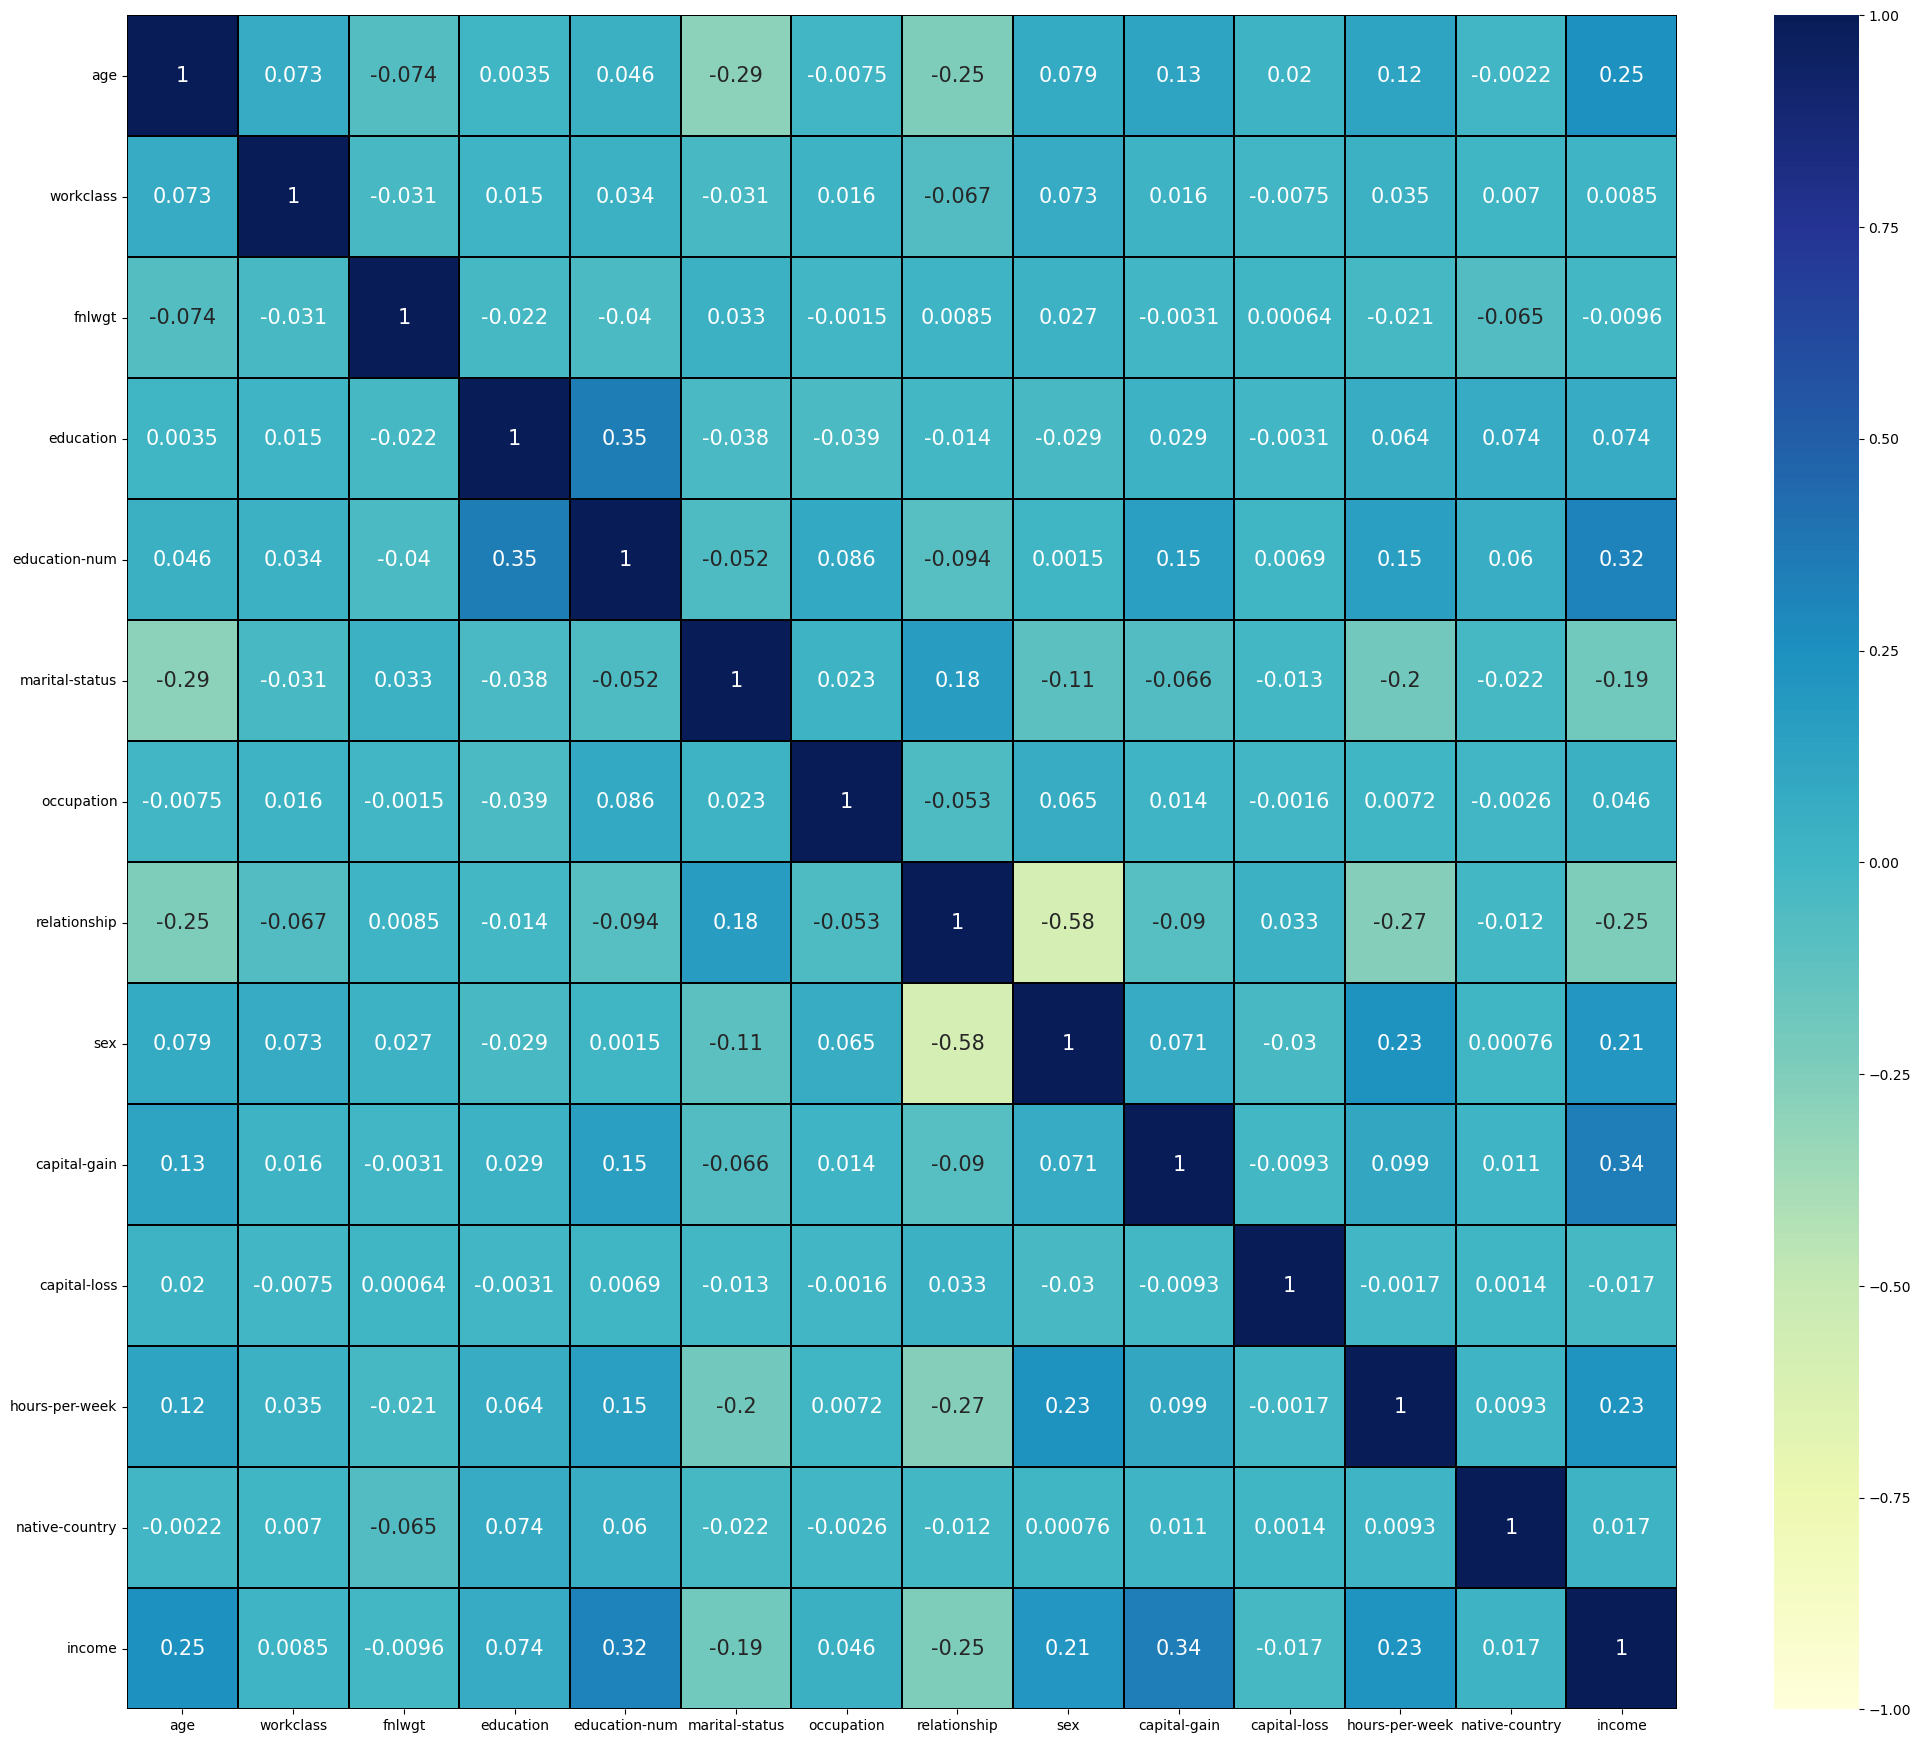

In [190]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

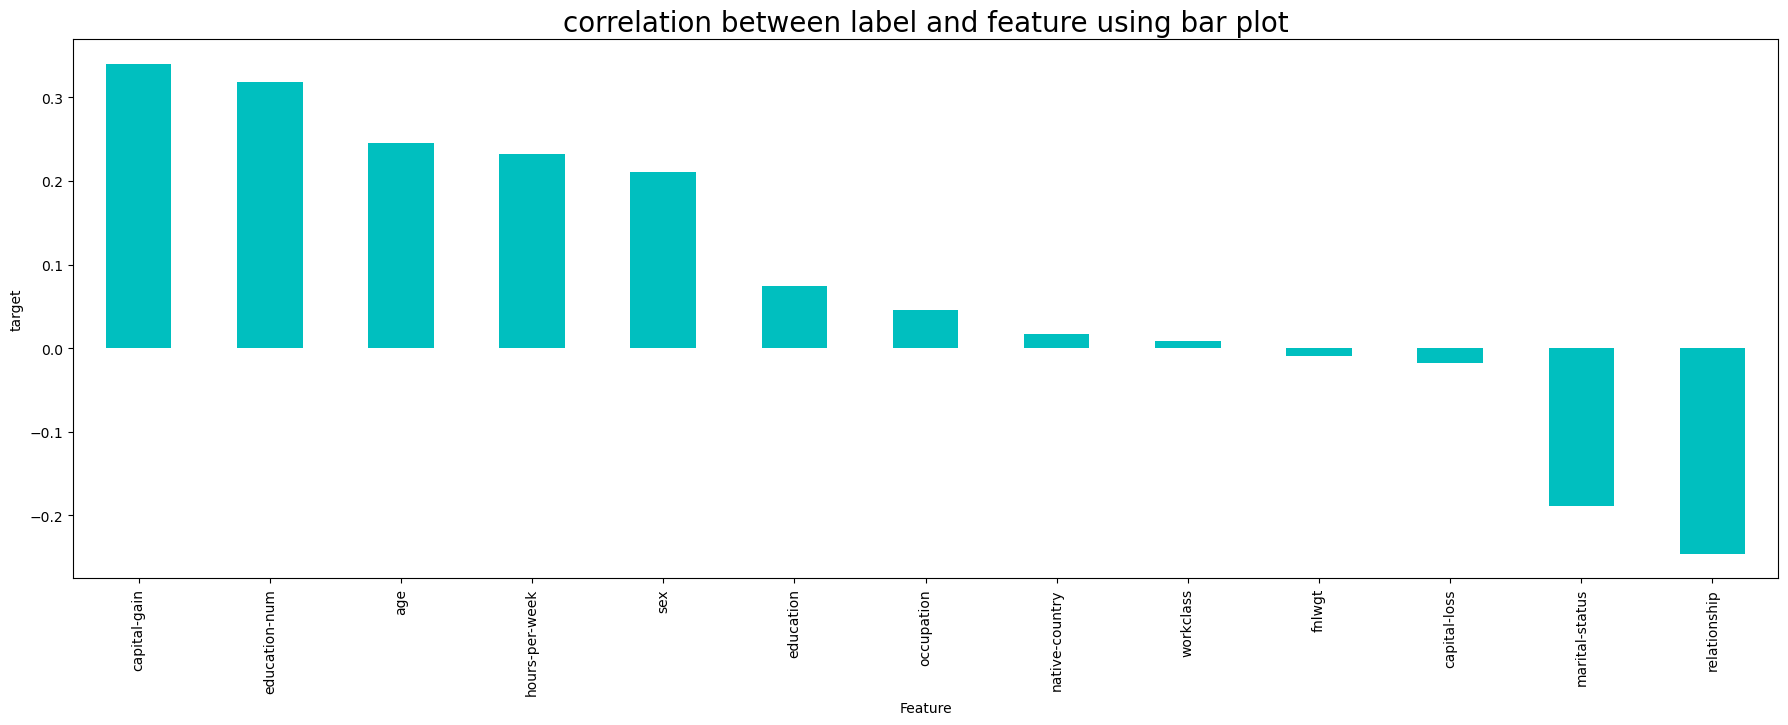

In [192]:
#Visualizing the correlation between label(primary_fuel) and features using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['income'].sort_values(ascending=False).drop(['income']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Observation

    Positive -> Capital-gain, educationa-num, Age, hourds-per-week , educational,occuaption
    
    Negative -> Relationship ,Martial Status , Capital-Loss

# Model Building

In [193]:
x = new_df.drop("income", axis=1)
y = new_df["income"]

In [194]:
#Lets check for the shape of the x
x.shape

(27602, 13)

In [195]:
#Lets check for the shape of y
y.shape

(27602,)

In [196]:
#Checking for skewness
x.skew()

age                0.448205
workclass          1.191987
fnlwgt             0.630530
education         -1.088723
education-num     -0.162510
marital-status    -0.042440
occupation         0.115085
relationship       0.776178
sex               -0.710376
capital-gain       4.855843
capital-loss      28.995677
hours-per-week    -0.280221
native-country    -4.232569
dtype: float64

So, Here we set threshold for +/- 0.5 . and only remove in continious data

In [197]:
#Removing skewness using yeo_johnson method
skew = ["capital-gain","capital-loss",'hours-per-week']

In [198]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [199]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,capital-gain,capital-loss,hours-per-week
0,3.351829,-0.040857,-0.075227
1,-0.298342,-0.040857,-2.341947
2,-0.298342,-0.040857,-0.075227
3,-0.298342,-0.040857,-0.075227
4,-0.298342,-0.040857,-0.075227


In [200]:
# Checking skewness after using yeo-johnson ethod
x.skew()

age                0.448205
workclass          1.191987
fnlwgt             0.630530
education         -1.088723
education-num     -0.162510
marital-status    -0.042440
occupation         0.115085
relationship       0.776178
sex               -0.710376
capital-gain       3.053678
capital-loss      24.435835
hours-per-week     0.125698
native-country    -4.232569
dtype: float64

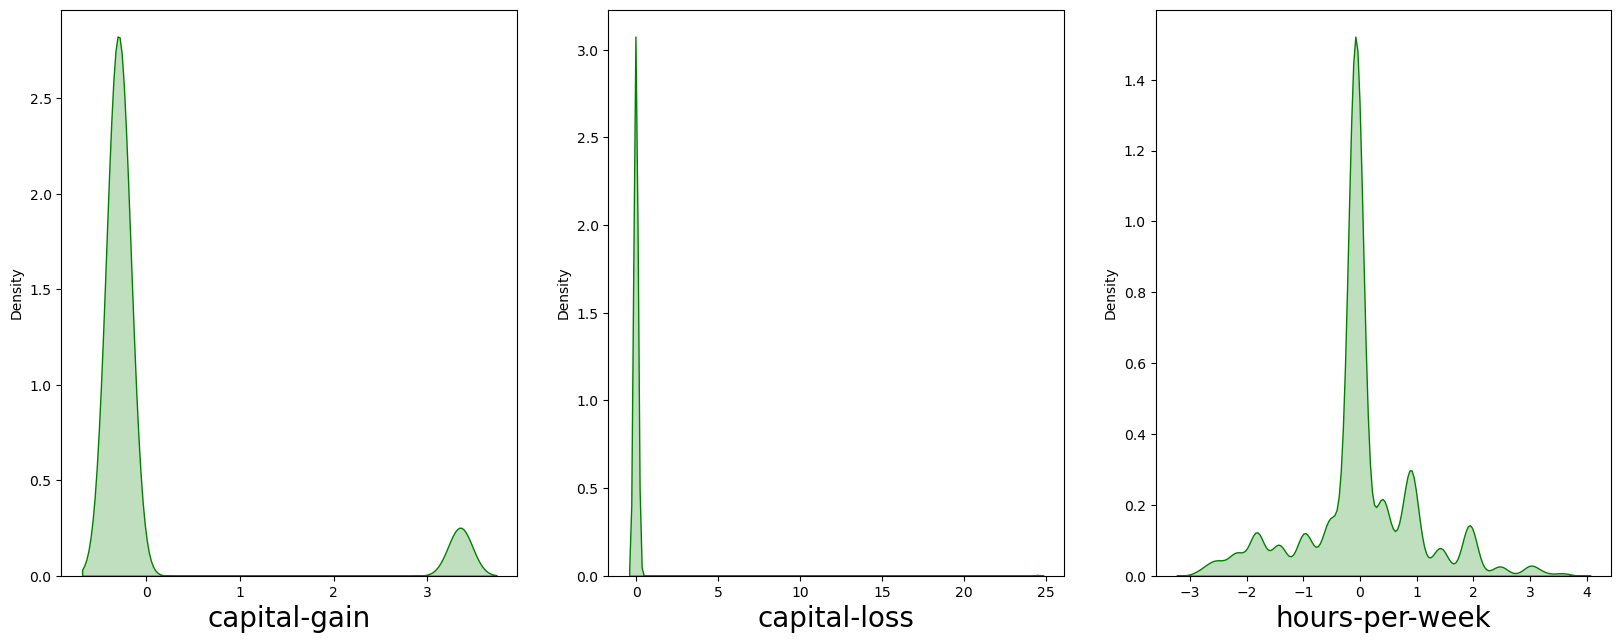

In [201]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Yes we converter but . Not  get Normal Distribtuion . but its okay MoVE Foreward.

In [202]:
#Resolving the class imbalance issue in label column
y.value_counts()

0    21226
1     6376
Name: income, dtype: int64

In [203]:
from imblearn.over_sampling import SMOTE
# adding samples to make all the categorical quality values same

oversample = SMOTE()
x,y= oversample.fit_resample(x,y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [204]:
y.value_counts()

0    21226
1    21226
Name: income, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [205]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,-0.074118,3.166910,-1.147838,-0.408790,1.098137,1.242147,-1.556409,-0.081139,0.667030,2.912336,-0.034955,-0.240034,0.268476
1,0.864227,2.074466,-1.085975,-0.408790,1.098137,-0.276599,-0.765618,-0.735615,0.667030,-0.417291,-0.034955,-2.659183,0.268476
2,-0.159422,-0.110423,0.326721,0.271597,-0.636474,-1.795345,-0.238424,-0.081139,0.667030,-0.417291,-0.034955,-0.240034,0.268476
3,1.120140,-0.110423,0.530349,-2.790145,-1.503780,-0.276599,-0.238424,-0.735615,0.667030,-0.417291,-0.034955,-0.240034,0.268476
4,-1.012463,-0.110423,1.637235,-0.408790,1.098137,-0.276599,0.815963,2.536764,-1.499184,-0.417291,-0.034955,-0.240034,-5.746718


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

In [206]:
# Checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.175456,age
1,1.006897,workclass
2,1.011505,fnlwgt
3,1.088565,education
4,1.154667,education-num
5,1.143019,marital-status
6,1.018846,occupation
7,1.731823,relationship
8,1.553211,sex
9,1.039899,capital-gain


So, here we set threshold for +/-10 for VIF . and we can see that we dont have any multicollinearity problem.

In [209]:
#Lets use any other feature selection technique
from sklearn.feature_selection import SelectKBest,f_classif

In [210]:
select_feature=SelectKBest(score_func=f_classif,k=12)
fit=select_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)

best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
print(best_feature.nlargest(14,'Score'))

           Feature        Score
7     relationship  6187.269874
4    education-num  5412.943948
0              age  4341.186476
11  hours-per-week  4066.186262
5   marital-status  3891.995688
9     capital-gain  3516.358634
8              sex  1287.219951
1        workclass   367.681566
3        education   111.953450
10    capital-loss    29.419184
12  native-country    16.747405
6       occupation    16.453137
2           fnlwgt     2.183377


So, Here we can see that all the feature contributing in the model building.

# Model Building

In [247]:
!pip install xgboost


In [220]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score

In [248]:
import xgboost as XGBClassifier

In [218]:
xgb=xgb.XGBClassifier()

In [214]:
#Lets make one fucntion to check accuracy again and again
def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))
        cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
        print("Cross Validation Score:", cv_score)

In [226]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    xgb.fit(x_train,y_train)
    x_pred=xgb.predict(x_train)
    y_pred=xgb.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9325991578575424
 At random state 0 , the testing accuracy is :- 0.9018961253091509
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.89      0.91      0.90      4222
           1       0.91      0.89      0.90      4269

    accuracy                           0.90      8491
   macro avg       0.90      0.90      0.90      8491
weighted avg       0.90      0.90      0.90      8491

 At random state 0 , the Confusion matrix is :- [[3861  361]
 [ 472 3797]]


 At random state 1 , the testing accuracy is :- 0.9310090986720061
 At random state 1 , the testing accuracy is :- 0.906960310917442
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.90      0.92      0.91      4229
           1       0.92      0.90      0.91      4262

    accuracy                           0.91      8491
   macro avg     

In [227]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [229]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [231]:
metrics_score(xgb,x_train,x_test,y_train,y_test,train=True)
metrics_score(xgb,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.9311857719148435
======================Testing Score====================
Accuracy Score==>   0.9007184077258273
Classification Report==>                precision    recall  f1-score   support

           0       0.89      0.91      0.90      4193
           1       0.91      0.89      0.90      4298

    accuracy                           0.90      8491
   macro avg       0.90      0.90      0.90      8491
weighted avg       0.90      0.90      0.90      8491

Confusion Matrix==>  [[3814  379]
 [ 464 3834]]
Cross Validation Score: 88.36372968315791


In [238]:
#Lets do Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10,5,4],
    'gamma': [0, 0.1, 0.2]
}

# Define grid search
grid_search = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='accuracy',cv=5,n_jobs=-1)

# Fit grid search
grid_search.fit(x, y)

# Print best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 10}
Best score: 0.8611166871206664


In [252]:
grid_search.score(x_train,y_train)

0.8738847501545891

In [254]:
cnn=grid_search.score(x_test,y_test)

In [255]:
from sklearn.metrics import roc_curve, auc

In [256]:
#predicting the data
y_pred_cnb = grid_search.predict(x_test)
y_prob_pred_cnb = grid_search.predict_proba(x_test)

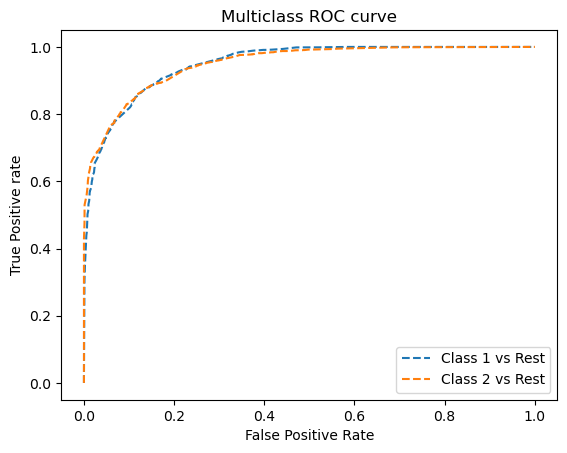

In [257]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', label='Class 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

In [258]:
import pickle
filename=('Pranathi Machine Learning(XG Boost) Assignment 5.0 ')
pickle.dump(grid_search,open(filename,'wb'))

# Conclusion

In [259]:
loaded_model=pickle.load(open('Pranathi Machine Learning(XG Boost) Assignment 5.0 ','rb'))
result=grid_search.score(x_test,y_test)
print(result*100)

86.98622070427511


In [287]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,33951,33952,33953,33954,33955,33956,33957,33958,33959,33960
predicted,1,1,0,1,0,0,1,1,0,1,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
original,0,1,0,0,1,0,0,1,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Intern at Pranathi
#Student of DataTrained - Saurav
#Date -> 12-04-2023
#Time - 13:31 